In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import time 
import datetime
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [2]:
import talib as ta

In [4]:
df1=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXXFUTURE.xlsx","UX1 Index")
df2=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXXFUTURE.xlsx","UX2 Index")

## Obtain new data for VVIX

In [139]:
VVIX=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\ETF_CS.xlsx","VVIX")
ux1new=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\ETF_CS.xlsx","UX1")
ux2new=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\ETF_CS.xlsx","UX2")


In [142]:
SVXY=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\ETFVIX.xlsx","SVXY")
UVXY=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\ETFVIX.xlsx","UVXY")



In [329]:
SVXYd=SVXY.copy()
UVXYd=UVXY.copy()

In [330]:
vvixdata=VVIX.copy()
ux1data=ux1new.copy()
ux2data=ux2new.copy()

In [331]:
vvixdata.set_index('Dates',drop=True,inplace=True)
ux1data.set_index('Dates',drop=True,inplace=True)
ux2data.set_index('Dates',drop=True,inplace=True)
SVXYd.set_index('Dates',drop=True,inplace=True)
UVXYd.set_index('Dates',drop=True,inplace=True)
#Localize the HK time zone
vvixdata.index=pd.to_datetime(vvixdata.index).tz_localize('Hongkong') #UTC-5
ux1data.index=pd.to_datetime(ux1data.index).tz_localize('Hongkong')
ux2data.index=pd.to_datetime(ux2data.index).tz_localize('Hongkong')
SVXYd.index=pd.to_datetime(SVXYd.index).tz_localize('Hongkong')
UVXYd.index=pd.to_datetime(UVXYd.index).tz_localize('Hongkong')
#Conver the HK time zone 
vvixdata.index=pd.to_datetime(vvixdata.index).tz_convert('US/Eastern') #UTC-5
ux1data.index=pd.to_datetime(ux1data.index).tz_convert('US/Eastern')
ux2data.index=pd.to_datetime(ux2data.index).tz_convert('US/Eastern')
SVXYd.index=pd.to_datetime(SVXYd.index).tz_convert('US/Eastern')
UVXYd.index=pd.to_datetime(UVXYd.index).tz_convert('US/Eastern')

In [362]:
finalUXV=pd.concat([UX12Contango,vvixdata['CloseVVIX']],axis=1,join='inner')

In [354]:
finalUXV

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Open2,...,Volatility2,Time2,Spread,Date,ATR,ATR2,SpreadH,SpreadL,ATRSpread,CloseVVIX
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-13 10:31:00-04:00,31.55,31.30,31.55,31.10,27292.4785,872,415,0.014366,10:31:00,31.70,...,0.010146,10:31:00,0.22,2020-05-13,0.168508,0.142139,0.60,-0.17,0.305735,135.53
2020-05-13 10:33:00-04:00,31.35,31.30,31.38,31.24,5196.5103,166,104,0.004471,10:33:00,31.55,...,0.004763,10:33:00,0.22,2020-05-13,0.166472,0.142701,0.33,0.04,0.304611,135.51
2020-05-14 15:45:00-04:00,33.60,33.30,33.60,33.30,21462.1992,642,296,0.008969,15:45:00,33.73,...,0.006842,15:45:00,0.20,2020-05-14,0.318866,0.290365,0.43,-0.10,0.320710,138.26
2020-05-14 15:49:00-04:00,33.50,33.16,33.50,33.16,10069.5840,302,162,0.010201,15:49:00,33.65,...,0.008356,15:49:00,0.21,2020-05-14,0.320376,0.289625,0.49,-0.13,0.342088,138.16
2020-05-14 15:50:00-04:00,33.20,33.10,33.29,33.10,13108.1074,395,175,0.005724,15:50:00,33.40,...,0.004786,15:50:00,0.25,2020-05-14,0.311063,0.280366,0.41,0.06,0.342653,138.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 15:56:00-05:00,26.03,26.05,26.05,25.95,6761.1099,260,121,0.003846,15:56:00,26.63,...,0.003759,15:56:00,0.56,2020-11-12,0.166635,0.134199,0.70,0.50,0.273868,122.91
2020-11-12 15:57:00-05:00,26.06,25.95,26.06,25.93,7035.1699,271,145,0.005001,15:57:00,26.62,...,0.005644,15:57:00,0.65,2020-11-12,0.164018,0.135328,0.72,0.44,0.274306,122.74
2020-11-12 15:58:00-05:00,25.95,25.86,25.95,25.80,28806.4590,1112,368,0.005797,15:58:00,26.60,...,0.003759,15:58:00,0.71,2020-11-12,0.163017,0.132805,0.85,0.60,0.272570,122.82


In [351]:
vvixdata.columns=['Open','CloseVVIX','High','Low','Value','Volume','Number']

In [194]:
VVIXNEW=vvixdata.between_time('09:30','16:00')
UX1NEW=ux1data.between_time('09:30','16:00')
UX2NEW=ux2data.between_time('09:30','16:00')
SVXYNEW=SVXYd.between_time('09:30','16:00')
UVXYNEW=UVXYd.between_time('09:30','16:00')

In [200]:
VVIXextended=vvixdata.between_time('15:55','16:15')
UX1NEWextended=ux1data.between_time('15:55','16:15')
UX2NEWextended=ux2data.between_time('15:55','16:15')

In [208]:
UX12NEWext=pd.concat([VVIXextended['Close'],UX1NEWextended['Close'],UX2NEWextended['Close']],axis=1,join='inner')
UX12NEWext.columns=['VVIX','UX1','UX2']
UX12NEWext

,VVIX,UX1,UX2
Dates,,,
2020-05-13 15:55:00-04:00,142.96,35.25,34.85
2020-05-13 15:56:00-04:00,143.04,35.24,34.85
2020-05-13 15:57:00-04:00,142.44,34.99,34.62
2020-05-13 15:58:00-04:00,142.53,35.04,34.65
2020-05-13 15:59:00-04:00,142.99,35.22,34.82
...,...,...,...
2020-10-15 16:10:00-04:00,117.26,27.62,28.62
2020-10-15 16:11:00-04:00,117.27,27.60,28.60
2020-10-15 16:12:00-04:00,117.23,27.46,28.60


In [195]:
UXVVIX=pd.concat([VVIXNEW['Close'],UX1NEW['Close'],UX2NEW['Close'],SVXYNEW['Close'],UVXYNEW['Close']],axis=1,join='inner')
UXVVIX.columns=['VVIX','UX1','UX2','SVXY','UVXY']

In [215]:
UXVVIX['Spread']=UXVVIX['UX2']-UXVVIX['UX1']
UX12NEWext['Spread']=UX12NEWext['UX2']-UX12NEWext['UX1']

## ==========

In [5]:
data1=df1.copy()
data2=df2.copy()
#Set the date index
data1.set_index('Dates',drop=True,inplace=True)
data2.set_index('Dates',drop=True,inplace=True)
#Localize the HK time zone
data1.index=pd.to_datetime(data1.index).tz_localize('Hongkong') #UTC-5
data2.index=pd.to_datetime(data2.index).tz_localize('Hongkong')
#Conver the HK time zone 
data1.index=pd.to_datetime(data1.index).tz_convert('US/Eastern') #UTC-5
data2.index=pd.to_datetime(data2.index).tz_convert('US/Eastern')


In [6]:
UX1=data1.between_time('09:30','16:00')
UX2=data2.between_time('09:30','16:00')

In [7]:
UX1['Volatility']=np.log(UX1['High'])-np.log(UX1['Low'])
UX2['Volatility']=np.log(UX2['High'])-np.log(UX2['Low'])
UX1['TIME']=UX1.index.time
UX2['TIME']=UX2.index.time

<ipython-input-7-887cdb5e9f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX1['Volatility']=np.log(UX1['High'])-np.log(UX1['Low'])
<ipython-input-7-887cdb5e9f5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX2['Volatility']=np.log(UX2['High'])-np.log(UX2['Low'])
<ipython-input-7-887cdb5e9f5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [8]:
UX12=pd.concat([UX1,UX2],axis=1, join='inner')
UX12.columns=['Open','Close','High','Low','Value','Volume','Number Ticks','Volatility','Time','Open2','Close2','High2','Low2','Value2','Volume2','Number Ticks2','Volatility2','Time2']
UX12['Spread']=(UX12['Close2']-UX12['Close'])

### Including Extended Hours

In [41]:
UX1extended=data1.between_time('15:55','17:00')
UX2extended=data2.between_time('15:55','17:00')
UX1extended['Volatility']=np.log(UX1extended['High'])-np.log(UX1extended['Low'])
UX2extended['Volatility']=np.log(UX2extended['High'])-np.log(UX2extended['Low'])
UX1extended['TIME']=UX1extended.index.time
UX2extended['TIME']=UX2extended.index.time
UX1extended['DAY']=UX1extended.index.dayofweek #Monday=0 Sunday=6 for seasonality grouping
UX2extended['DAY']=UX2extended.index.dayofweek
UX12extended=pd.concat([UX1extended,UX2extended],axis=1, join='inner')
UX12extended.columns=['Open','Close','High','Low','Value','Volume','Number Ticks','Volatility','Time','Day','Open2','Close2','High2','Low2','Value2','Volume2','Number Ticks2','Volatility2','Time2','Day2']
UX12extended['Spread']=(UX12extended['Close2']-UX12extended['Close'])

<ipython-input-41-70b284537258>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX1extended['Volatility']=np.log(UX1extended['High'])-np.log(UX1extended['Low'])
<ipython-input-41-70b284537258>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX2extended['Volatility']=np.log(UX2extended['High'])-np.log(UX2extended['Low'])
<ipython-input-41-70b284537258>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [42]:
UX12['Date']=UX12.index.date

In [11]:
def add_week_of_month(df):
    df['week_in_month'] = pd.to_numeric(df.index.day/7)
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df
UX12extended['Date']=UX12extended.index.date
UX12extended=add_week_of_month(UX12extended)

In [44]:
UX12extended

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Day,...,Close2,High2,Low2,Value2,Volume2,Number Ticks2,Volatility2,Time2,Day2,Spread
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-01 15:55:00-04:00,37.05,37.02,37.10,37.00,6631.9912,179,108,0.002699,15:55:00,4,...,35.57,35.60,35.55,3699.6299,104,70,0.001405,15:55:00,4,-1.45
2020-05-01 15:56:00-04:00,37.00,37.03,37.05,37.00,3481.8406,94,70,0.001350,15:56:00,4,...,35.60,35.60,35.55,1707.7600,48,37,0.001405,15:56:00,4,-1.43
2020-05-01 15:57:00-04:00,37.00,37.04,37.05,37.00,3886.5500,105,75,0.001350,15:57:00,4,...,35.57,35.60,35.54,3697.9998,104,82,0.001687,15:57:00,4,-1.47
2020-05-01 15:58:00-04:00,37.00,36.94,37.05,36.94,6768.5791,183,143,0.002973,15:58:00,4,...,35.51,35.60,35.50,4049.7800,114,65,0.002813,15:58:00,4,-1.43
2020-05-01 15:59:00-04:00,36.94,36.85,36.95,36.85,12099.1943,328,240,0.002710,15:59:00,4,...,35.45,35.52,35.45,5321.3384,150,105,0.001973,15:59:00,4,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 16:53:00-05:00,25.70,25.70,25.70,25.70,128.5000,5,3,0.000000,16:53:00,3,...,26.40,26.40,26.40,158.4000,6,2,0.000000,16:53:00,3,0.70
2020-11-12 16:54:00-05:00,25.70,25.70,25.70,25.70,77.1000,3,3,0.000000,16:54:00,3,...,26.40,26.40,26.40,105.6000,4,1,0.000000,16:54:00,3,0.70
2020-11-12 16:55:00-05:00,25.75,25.75,25.75,25.75,206.0000,8,7,0.000000,16:55:00,3,...,26.40,26.40,26.40,211.2000,8,3,0.000000,16:55:00,3,0.65


### Bid Ask Spread

In [12]:
df1bid=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXBIDASK.xlsx","UX1BID")


In [13]:
df1ask=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXBIDASK.xlsx","UX1ASK")


In [14]:
df2bid=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXBIDASK.xlsx","UX2BID")


In [15]:
df2ask=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\VIXBIDASK.xlsx","UX2ASK")

In [17]:
data1bid=df1bid.copy()
data1ask=df1ask.copy()
data2bid=df2bid.copy()
data2ask=df2ask.copy()

In [18]:
#Set the date index
data1bid.set_index('Dates',drop=True,inplace=True)
data1ask.set_index('Dates',drop=True,inplace=True)
data2bid.set_index('Dates',drop=True,inplace=True)
data2ask.set_index('Dates',drop=True,inplace=True)
#Localize the HK time zone
data1bid.index=pd.to_datetime(data1bid.index).tz_localize('Hongkong') #UTC-5
data1ask.index=pd.to_datetime(data1ask.index).tz_localize('Hongkong')
data2bid.index=pd.to_datetime(data2bid.index).tz_localize('Hongkong') #UTC-5
data2ask.index=pd.to_datetime(data2ask.index).tz_localize('Hongkong')
#Conver the HK time zone 
data1bid.index=pd.to_datetime(data1bid.index).tz_convert('US/Eastern') #UTC-5
data1ask.index=pd.to_datetime(data1ask.index).tz_convert('US/Eastern')
data2bid.index=pd.to_datetime(data2bid.index).tz_convert('US/Eastern') #UTC-5
data2ask.index=pd.to_datetime(data2ask.index).tz_convert('US/Eastern')

In [22]:
UX1extended=data1.between_time('15:55','17:00')
UX2extended=data2.between_time('15:55','17:00')
UX1extended['Volatility']=np.log(UX1extended['High'])-np.log(UX1extended['Low'])
UX2extended['Volatility']=np.log(UX2extended['High'])-np.log(UX2extended['Low'])
UX12extended=pd.concat([UX1extended,UX2extended],axis=1, join='inner')
UX12extended.columns=['Open','Close','High','Low','Value','Volume','Number Ticks','Volatility','Open2','Close2','High2','Low2','Value2','Volume2','Number Ticks2','Volatility2']
UX12extended['Spread']=(UX12extended['Close2']-UX12extended['Close'])

<ipython-input-22-fc167e1a359c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX1extended['Volatility']=np.log(UX1extended['High'])-np.log(UX1extended['Low'])
<ipython-input-22-fc167e1a359c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX2extended['Volatility']=np.log(UX2extended['High'])-np.log(UX2extended['Low'])


In [23]:
UX1extendedbid=data1bid.between_time('15:55','17:00')
UX1extendedask=data1ask.between_time('15:55','17:00')
UX2extendedbid=data2bid.between_time('15:55','17:00')
UX2extendedask=data2ask.between_time('15:55','17:00')
UX12extendedbidask=pd.concat([UX1extendedbid,UX1extendedask,UX2extendedbid,UX2extendedask],axis=1, join='inner')
UX12extendedbidask.columns=['OpenB1','CloseB1','HighB1','LowB1','ValueB1','VolumeB1','Number TicksB1','OpenA1','CloseA1','HighA1','LowA1','ValueA1','VolumeA1','Number TicksA1','OpenB2','CloseB2','HighB2','LowB2','ValueB2','VolumeB2','Number TicksB2','OpenA2','CloseA2','HighA2','LowA2','ValueA2','VolumeA2','Number TicksA2']

In [24]:
UX12extendedbidask.at_time('15:55')[['CloseB1','CloseA1','CloseB2','CloseA2']]

,CloseB1,CloseA1,CloseB2,CloseA2
Dates,,,,
2020-05-06 15:55:00-04:00,34.20,34.25,34.15,34.20
2020-05-07 15:55:00-04:00,32.90,32.95,33.05,33.10
2020-05-08 15:55:00-04:00,29.70,29.75,31.00,31.05
2020-05-11 15:55:00-04:00,27.80,27.85,28.95,29.00
2020-05-12 15:55:00-04:00,31.10,31.15,31.30,31.35
...,...,...,...,...
2020-11-11 15:55:00-05:00,23.80,23.85,24.90,24.95
2020-11-12 15:55:00-05:00,26.00,26.10,26.60,26.65
2020-11-13 15:55:00-05:00,23.50,23.55,24.80,24.85


### Normal + Extended

In [118]:
#to CSV
UX1.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\UX1_clean.csv")
UX2.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\UX2_clean.csv")
UX12.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\VIX\\UX12_clean.csv")

# Analysis

In [25]:
VOL1=UX1.groupby('TIME').mean()
VOL2=UX2.groupby('TIME').mean()


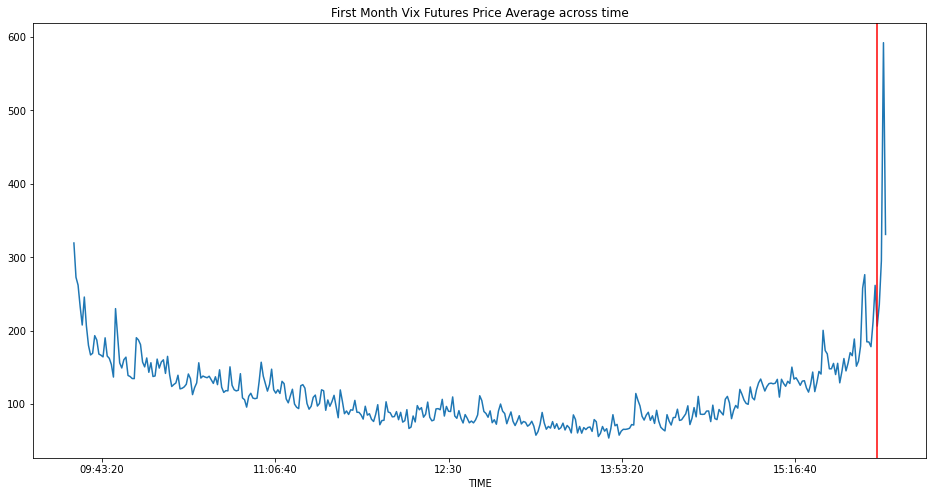

In [26]:
#VOL1['Volatility'].plot(figsize=(16,8))
VOL1['Volume'].plot(figsize=(16,8))
#VOL1[['Close','Open']].plot(figsize=(16,8))
plt.title('First Month Vix Futures Price Average across time')
plt.axvline('15:56:00', color='r')
#plt.axvline('16:00:00', color='g')

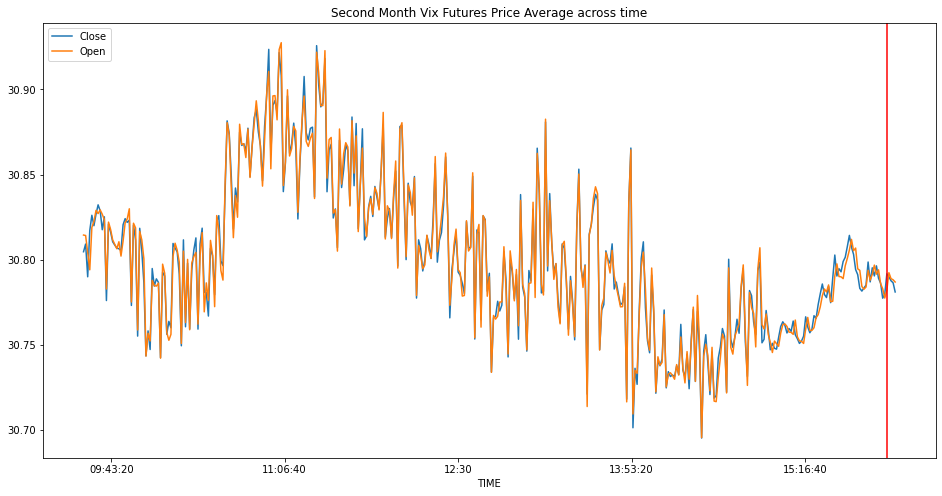

In [455]:
#VOL2['Volatility'].plot(figsize=(16,8))
#VOL2['Volume'].plot(figsize=(16,8))
VOL2[['Close','Open']].plot(figsize=(16,8))
#VOL1['Number Ticks'].plot(figsize=(16,8))
plt.title('Second Month Vix Futures Price Average across time')
plt.axvline('15:56:00', color='r')
#plt.axvline('15:40:00', color='g')

In [163]:
UX1.groupby('TIME').describe()

Open                                                               \
          count       mean       std    min      25%     50%      75%    max   
TIME                                                                           
09:30:00  134.0  29.256791  3.394559  21.70  27.0750  29.175  31.3875  39.85   
09:31:00  133.0  29.250526  3.392847  21.70  27.1500  29.100  31.4200  39.85   
09:32:00  134.0  29.249478  3.361349  21.66  27.0200  29.125  31.3875  39.70   
09:33:00  133.0  29.231053  3.386713  21.65  27.0500  29.100  31.2000  40.00   
09:34:00  134.0  29.258881  3.394677  21.67  26.9775  29.160  31.2375  40.55   
...         ...        ...       ...    ...      ...     ...      ...    ...   
15:56:00  131.0  29.196336  3.319965  21.88  26.8400  29.200  31.2050  39.41   
15:57:00  131.0  29.200382  3.306837  21.90  26.8400  29.220  31.2250  39.25   
15:58:00  131.0  29.199771  3.304985  21.97  26.8250  29.200  31.2300  38.97   
15:59:00  131.0  29.200000  3.298856  21.92  26.7950  29.110  31.2250  38.71   
16:00:00  131.0  29.192824  3.293249  21.90  26.7750  29.130  31.3050  38.78   

          Close             ... Number Ticks         Volatility            \
          count       mean  ...          75%     max      count      mean   
TIME                        ...                                             
09:30:00  134.0  29.251493  ...       207.00   645.0      134.0  0.005169   
09:31:00  133.0  29.248947  ...       189.00   520.0      133.0  0.004752   
09:32:00  134.0  29.230896  ...       182.00   508.0      134.0  0.004924   
09:33:00  133.0  29.256090  ...       173.00   451.0      133.0  0.004419   
09:34:00  134.0  29.268507  ...       160.25   408.0      134.0  0.004197   
...         ...        ...  ...          ...     ...        ...       ...   
15:56:00  131.0  29.202443  ...       135.50   426.0      131.0  0.003270   
15:57:00  131.0  29.202366  ...       145.00   646.0      131.0  0.003599   
15:58:00  131.0  29.196260  ...       173.50   736.0      131.0  0.003792   
15:59:00  131.0  29.196412  ...       314.00  1283.0      131.0  0.004892   
16:00:00  131.0  29.191756  ...       214.50   608.0      131.0  0.004573   

                                                                      
               std       min       25%       50%       75%       max  
TIME                                                                  
09:30:00  0.002519  0.000000  0.003593  0.004795  0.006460  0.015918  
09:31:00  0.002665  0.000000  0.003058  0.004295  0.005911  0.018798  
09:32:00  0.003234  0.000000  0.003011  0.004143  0.005828  0.017870  
09:33:00  0.002443  0.000000  0.002552  0.003738  0.005523  0.012423  
09:34:00  0.002430  0.000000  0.002608  0.003660  0.005104  0.016833  
...            ...       ...       ...       ...       ...       ...  
15:56:00  0.002043  0.000407  0.001835  0.002995  0.003940  0.012275  
15:57:00  0.002117  0.000000  0.001998  0.003296  0.004567  0.012561  
15:58:00  0.002202  0.000770  0.002373  0.003521  0.004503  0.016038  
15:59:00  0.002407  0.000422  0.003405  0.004409  0.005772  0.015748  
16:00:00  0.002691  0.001599  0.002605  0.003854  0.005781  0.014993  

[391 rows x 64 columns]

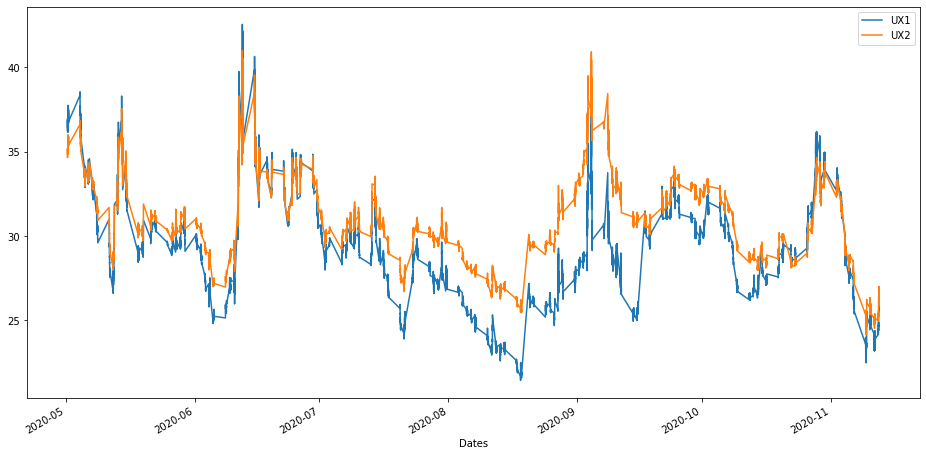

In [209]:
UX12['Close'].plot(figsize=(16,8),label='UX1')
UX12['Close2'].plot(figsize=(16,8),label='UX2')
plt.legend()
plt.show()

In [182]:
VOL12=UX12.groupby('Time').mean()

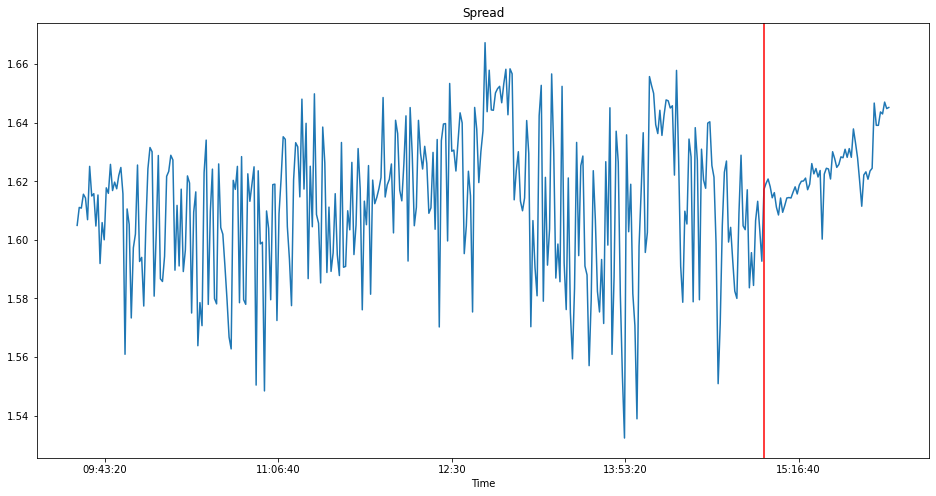

In [238]:
VOL12['Spread'].plot(figsize=(16,8))
plt.title('Spread')
plt.axvline('15:00:00', color='r')

# Analysis (Contango: Specific)

In [224]:
stdnew=UXVVIX.describe()[['Spread']].T['std'][0]

In [226]:
UXVVIXContango=UXVVIX[UXVVIX['Spread']>0.1*stdnew]


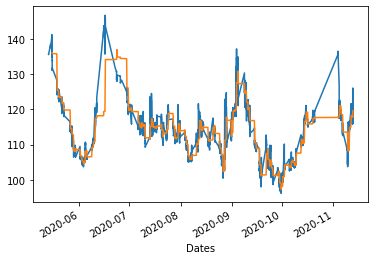

In [357]:
finalUXV['CloseVVIX'].plot()
finalUXV['CloseVVIX'].rolling(390).mean().plot()

In [392]:
finalUXV

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Open2,...,Time2,Spread,Date,ATR,ATR2,SpreadH,SpreadL,ATRSpread,CloseVVIX,CloseVVIXma
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-13 10:31:00-04:00,31.55,31.30,31.55,31.10,27292.4785,872,415,0.014366,10:31:00,31.70,...,10:31:00,0.22,2020-05-13,0.168508,0.142139,0.60,-0.17,0.305735,135.53,NaN
2020-05-13 10:33:00-04:00,31.35,31.30,31.38,31.24,5196.5103,166,104,0.004471,10:33:00,31.55,...,10:33:00,0.22,2020-05-13,0.166472,0.142701,0.33,0.04,0.304611,135.51,NaN
2020-05-14 15:45:00-04:00,33.60,33.30,33.60,33.30,21462.1992,642,296,0.008969,15:45:00,33.73,...,15:45:00,0.20,2020-05-14,0.318866,0.290365,0.43,-0.10,0.320710,138.26,NaN
2020-05-14 15:49:00-04:00,33.50,33.16,33.50,33.16,10069.5840,302,162,0.010201,15:49:00,33.65,...,15:49:00,0.21,2020-05-14,0.320376,0.289625,0.49,-0.13,0.342088,138.16,NaN
2020-05-14 15:50:00-04:00,33.20,33.10,33.29,33.10,13108.1074,395,175,0.005724,15:50:00,33.40,...,15:50:00,0.25,2020-05-14,0.311063,0.280366,0.41,0.06,0.342653,138.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 15:56:00-05:00,26.03,26.05,26.05,25.95,6761.1099,260,121,0.003846,15:56:00,26.63,...,15:56:00,0.56,2020-11-12,0.166635,0.134199,0.70,0.50,0.273868,122.91,119.618692
2020-11-12 15:57:00-05:00,26.06,25.95,26.06,25.93,7035.1699,271,145,0.005001,15:57:00,26.62,...,15:57:00,0.65,2020-11-12,0.164018,0.135328,0.72,0.44,0.274306,122.74,119.624410
2020-11-12 15:58:00-05:00,25.95,25.86,25.95,25.80,28806.4590,1112,368,0.005797,15:58:00,26.60,...,15:58:00,0.71,2020-11-12,0.163017,0.132805,0.85,0.60,0.272570,122.82,119.629256


In [29]:
std

1.6900417376612649

In [28]:
std=UX12.describe()[['Spread']].T['std'][0]

In [30]:
UX12Contango=UX12[UX12['Spread']>0.1*std]
UX12Back=UX12[UX12['Spread']<-0.1*std]
UX12Neutral=UX12[(UX12['Spread']<0.1*std)&(UX12['Spread']>-0.1*std)]

Text(0.5, 1.0, 'Density Plot and Histogram of the Spread')

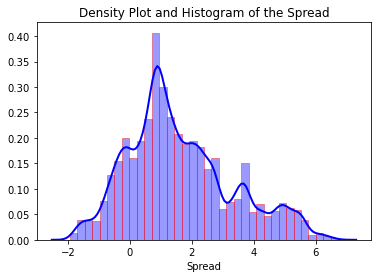

In [31]:
#UX12['Spread'].plot.hist(bins=30,alpha=0.8)
sns.distplot(UX12['Spread'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2})
plt.title('Density Plot and Histogram of the Spread')


### Contango

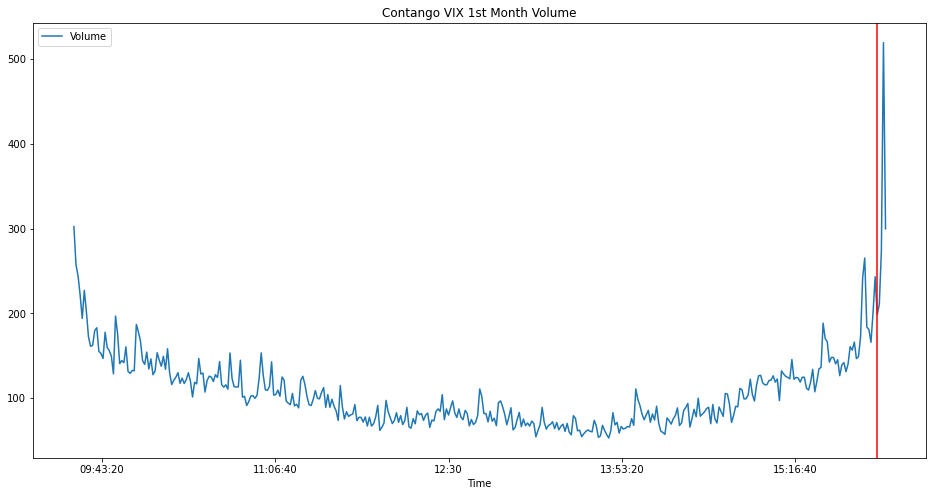

In [32]:
UX12Contango
Cont=UX12Contango.groupby('Time').mean()
Cont[['Volume']].plot(figsize=(16,8),label='UX1')
plt.title('Contango VIX 1st Month Volume')
plt.axvline('15:56:00', color='r')
plt.show()

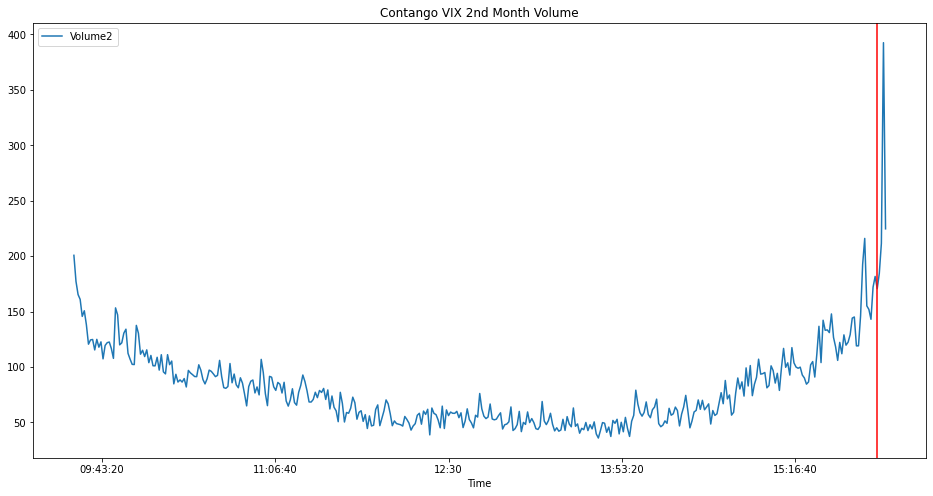

In [33]:
Cont[['Volume2']].plot(figsize=(16,8),label='UX2')
plt.title('Contango VIX 2nd Month Volume')
plt.axvline('15:56:00', color='r')
plt.show()

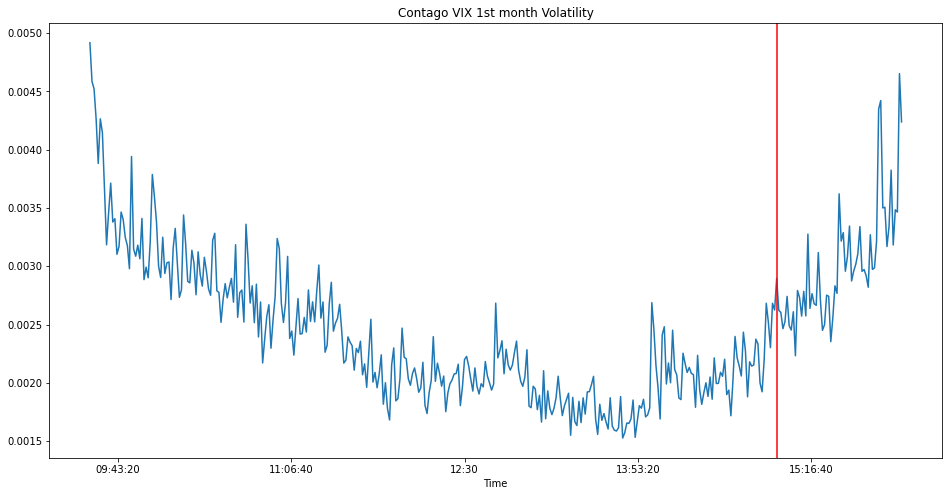

In [34]:
Cont['Volatility'].plot(figsize=(16,8))
plt.title("Contago VIX 1st month Volatility")
plt.axvline('15:00:00', color='r')

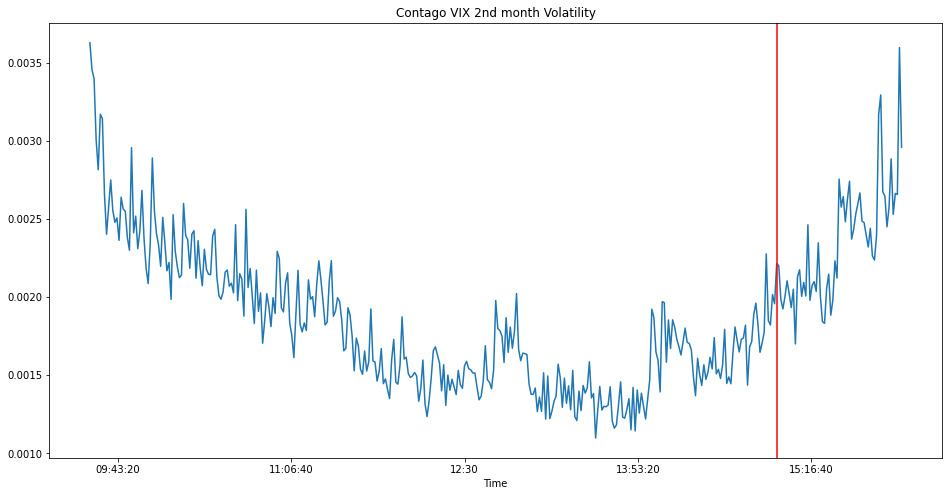

In [35]:
Cont['Volatility2'].plot(figsize=(16,8))
plt.title("Contago VIX 2nd month Volatility")
plt.axvline('15:00:00', color='r')

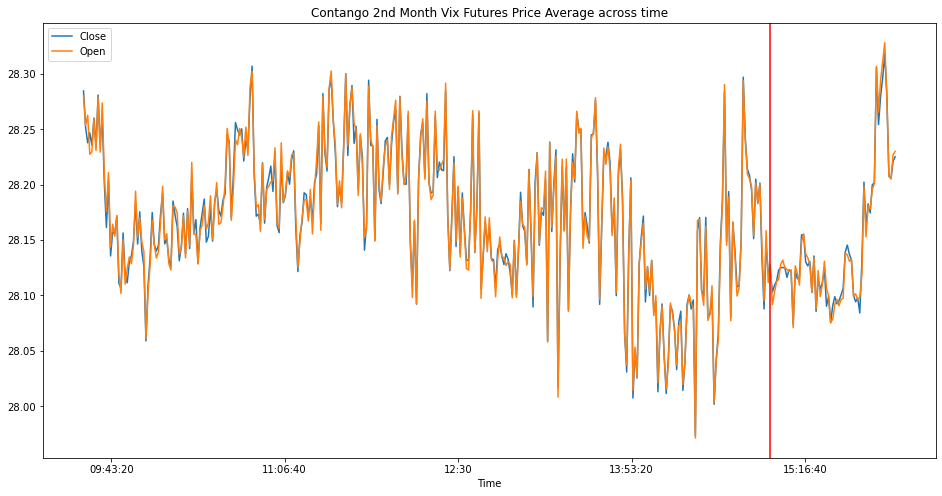

In [36]:
Cont[['Close','Open']].plot(figsize=(16,8))
plt.title('Contango 2nd Month Vix Futures Price Average across time')
plt.axvline('15:00:00', color='r')
#plt.axvline('15:40:00', color='g')

### Backwardation

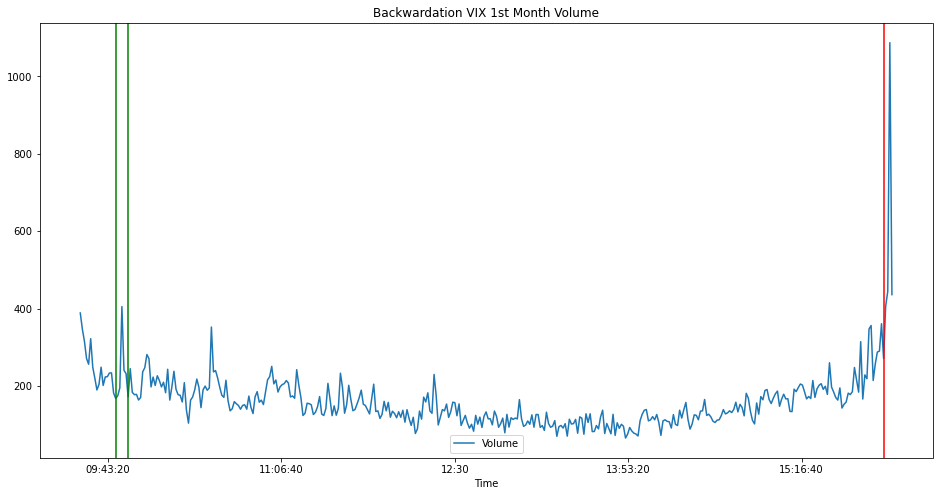

In [37]:
UX12Back
Back=UX12Back.groupby('Time').mean()
Back[['Volume']].plot(figsize=(16,8),label='UX1')
plt.title('Backwardation VIX 1st Month Volume')
plt.axvline('15:56:00', color='r')
plt.axvline('9:47:00', color='g')
plt.axvline('9:53:00', color='g')
#plt.axvline('10:28:00', color='g')
#plt.axvline('10:40:00', color='g')
plt.show()

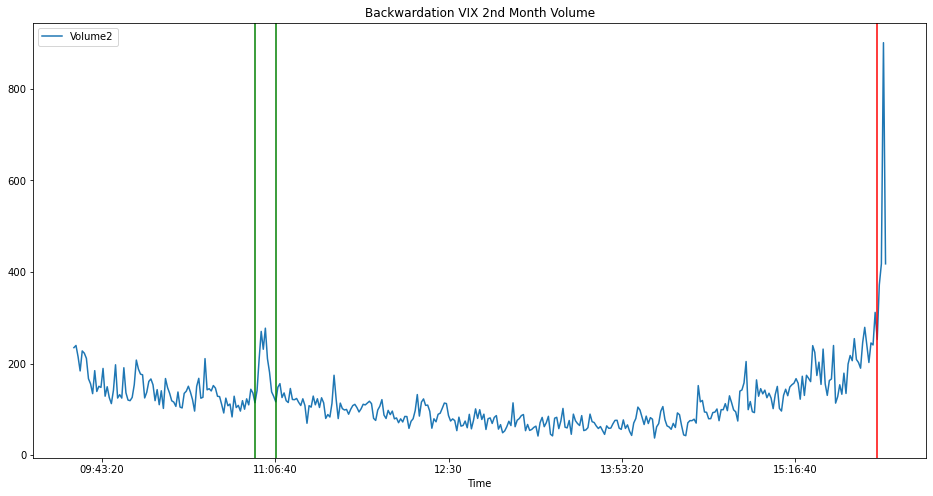

In [38]:
Back[['Volume2']].plot(figsize=(16,8),label='UX2')
plt.title('Backwardation VIX 2nd Month Volume')
plt.axvline('15:56:00', color='r')
plt.axvline('10:57:00', color='g')
plt.axvline('11:07:00', color='g')
plt.show()

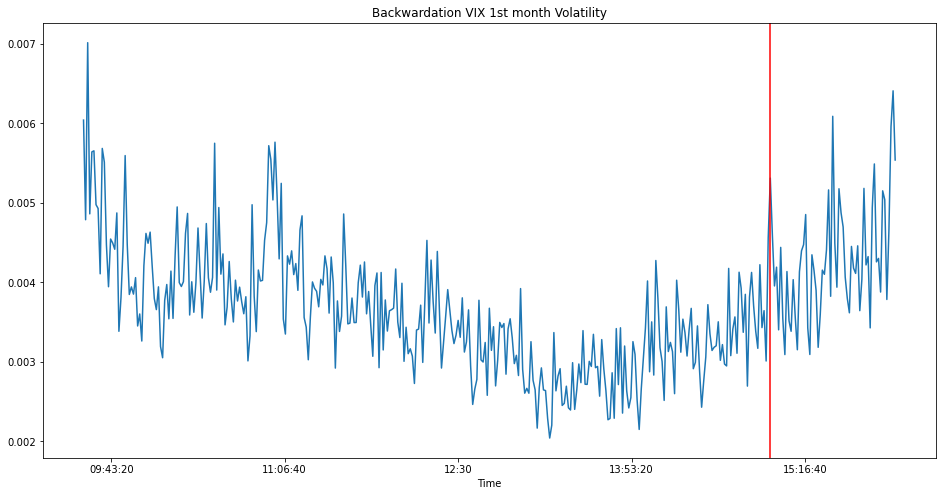

In [388]:
Back['Volatility'].plot(figsize=(16,8)) #/volatility2
plt.title("Backwardation VIX 1st month Volatility")
plt.axvline('15:00:00', color='r')

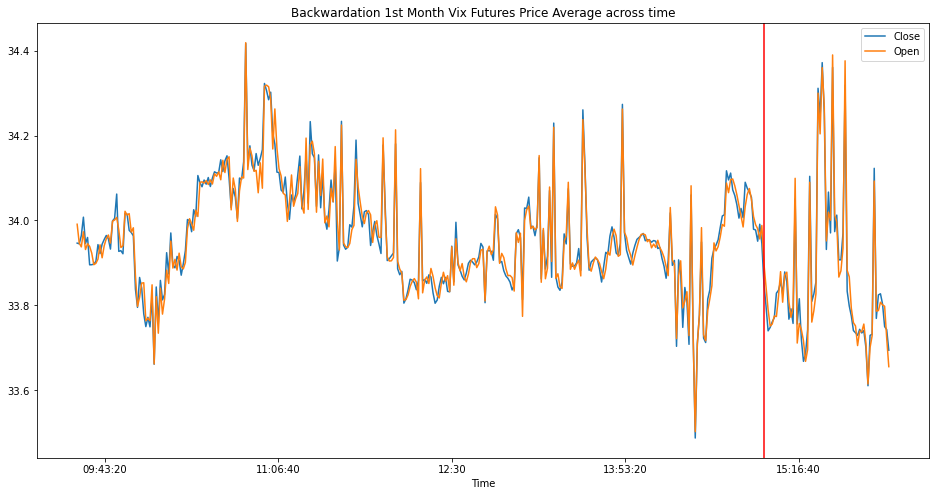

In [39]:
Back[['Close','Open']].plot(figsize=(16,8))
plt.title('Backwardation 1st Month Vix Futures Price Average across time')
plt.axvline('15:00:00', color='r')
#plt.axvline('15:40:00', color='g')

### Neutral

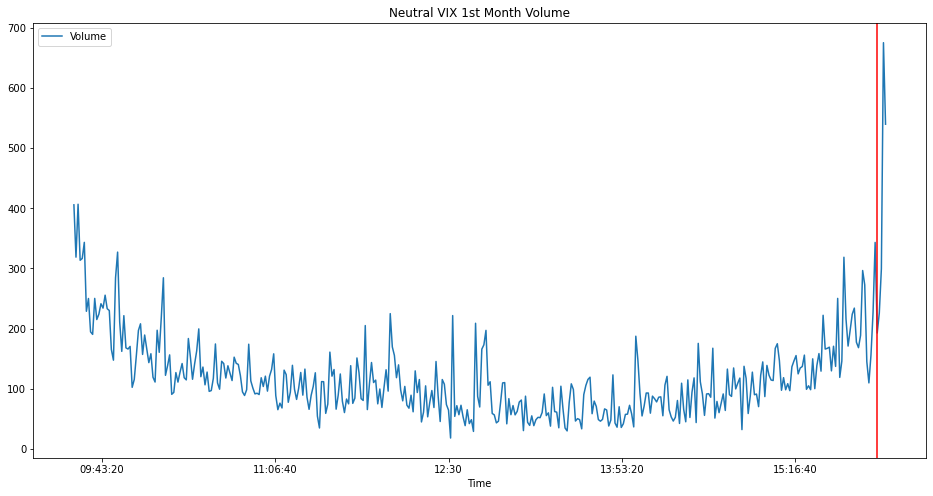

In [374]:
UX12Neutral
Neutral=UX12Neutral.groupby('Time').mean()
Neutral[['Volume']].plot(figsize=(16,8),label='UX1')
plt.title('Neutral VIX 1st Month Volume')
plt.axvline('15:56:00', color='r')
plt.show()

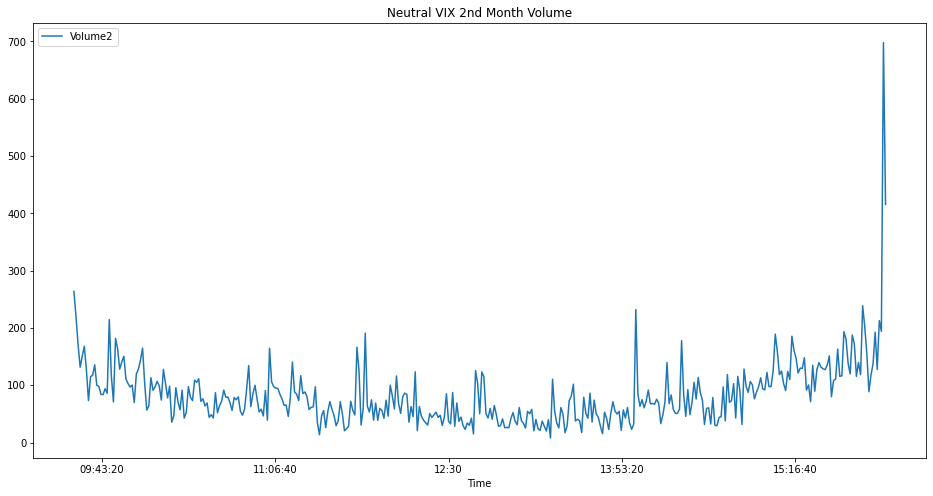

In [376]:
Neutral[['Volume2']].plot(figsize=(16,8),label='UX2')
plt.title('Neutral VIX 2nd Month Volume')
#plt.axvline('15:56:00', color='r')
plt.show()

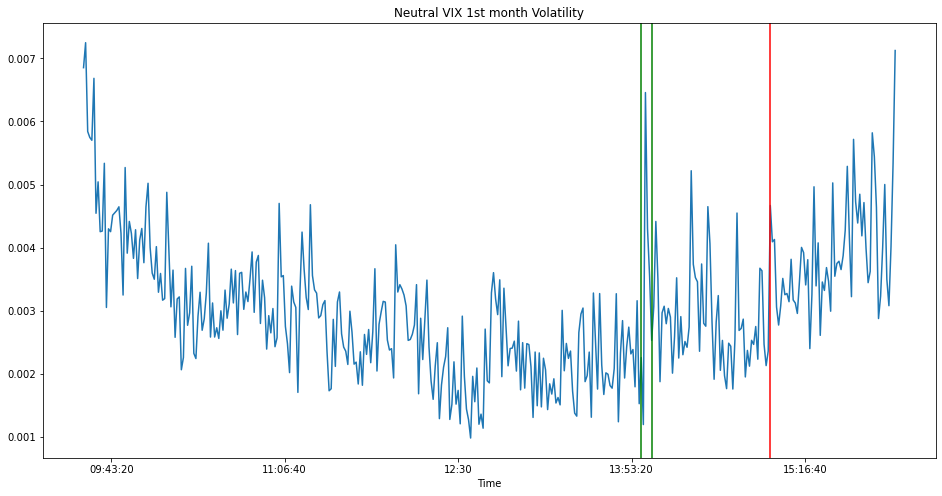

In [434]:
Neutral['Volatility'].plot(figsize=(16,8))
plt.title("Neutral VIX 1st month Volatility")
plt.axvline('15:00:00', color='r')
plt.axvline('13:58:00', color='g')
plt.axvline('14:03:00', color='g')

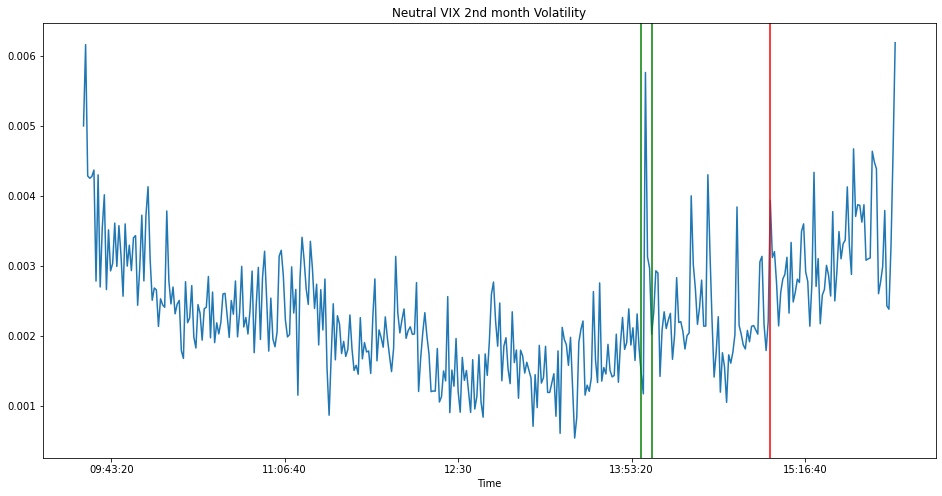

In [433]:
Neutral['Volatility2'].plot(figsize=(16,8))
plt.title("Neutral VIX 2nd month Volatility")
plt.axvline('15:00:00', color='r')
plt.axvline('13:58:00', color='g')
plt.axvline('14:03:00', color='g')

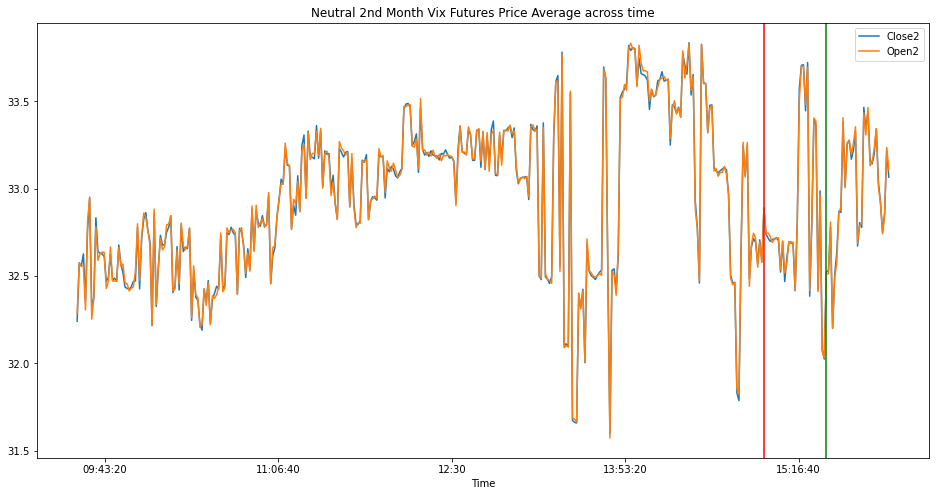

In [478]:
Neutral[['Close2','Open2']].plot(figsize=(16,8))
plt.title('Neutral 2nd Month Vix Futures Price Average across time')
plt.axvline('15:00:00', color='r')
plt.axvline('15:30:00', color='g')

# After Extended Hour

In [45]:
VOL12extended=UX12extended.groupby('Time').mean()

In [46]:
(UX12extended['Spread']<0).sum()


978

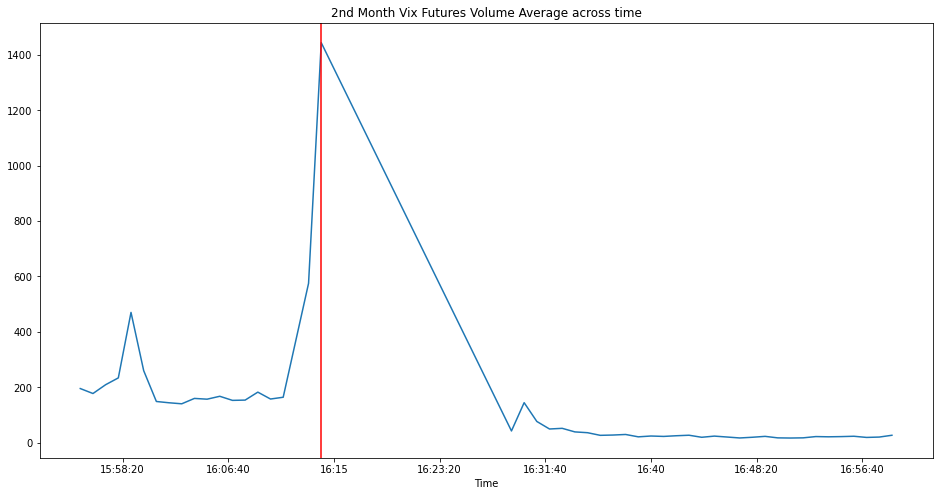

In [47]:
VOL12extended['Volume2'].plot(figsize=(16,8))
#VOL12extended[['Close','Open']].plot(figsize=(16,8))
plt.title('2nd Month Vix Futures Volume Average across time')
plt.axvline('16:14:00', color='r')
#plt.axvline('16:00:00', color='g')

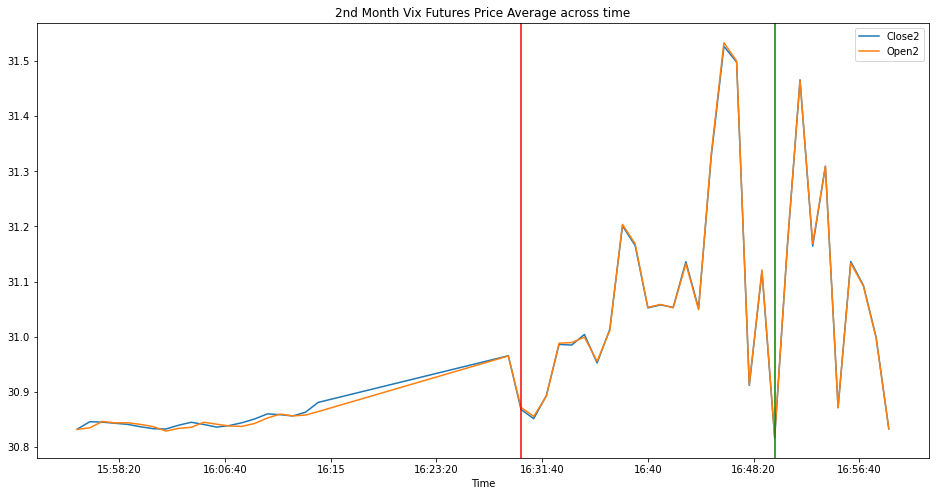

In [48]:
VOL12extended[['Close2','Open2']].plot(figsize=(16,8))
plt.title('2nd Month Vix Futures Price Average across time')
plt.axvline('16:30:00', color='r')
plt.axvline('16:50:00', color='g')

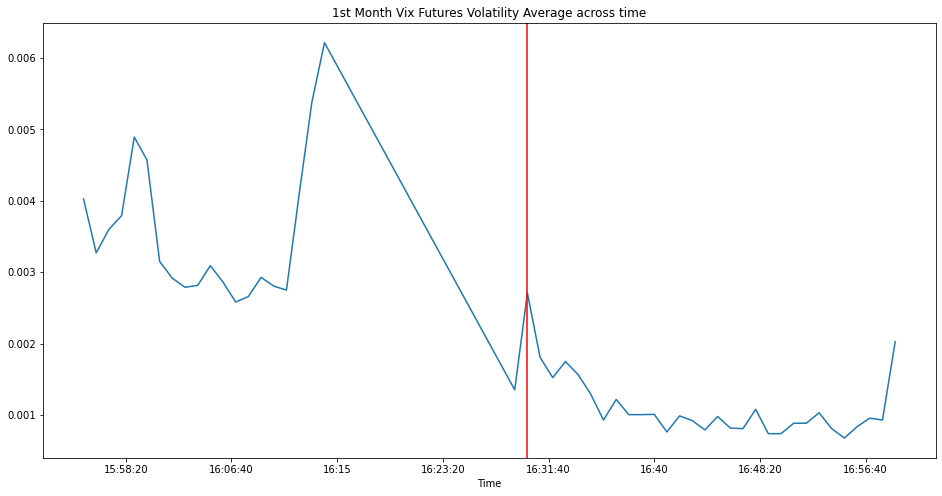

In [49]:
VOL12extended['Volatility'].plot(figsize=(16,8))
plt.title('1st Month Vix Futures Volatility Average across time')
plt.axvline('16:30:00', color='r')

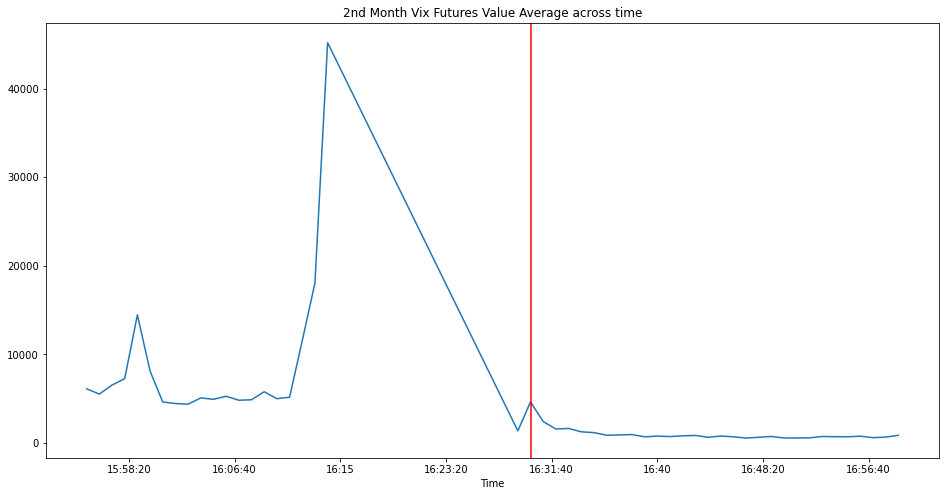

In [50]:
VOL12extended['Value2'].plot(figsize=(16,8))
plt.title('2nd Month Vix Futures Value Average across time')
plt.axvline('16:30:00', color='r')

In [51]:
VOL12extended.head()

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Day,Open2,Close2,High2,Low2,Value2,Volume2,Number Ticks2,Volatility2,Day2,Spread
Time,,,,,,,,,,,,,,,,,,,
15:55:00,29.196260,29.193435,29.250916,29.130916,7822.303676,261.732824,131.236641,0.004025,2.015267,30.832137,30.832519,30.878855,30.783282,6093.523446,195.335878,105.396947,0.003059,2.015267,1.639084
15:56:00,29.196336,29.202443,29.248550,29.151832,6112.707529,206.305344,109.381679,0.003270,2.015267,30.835115,30.846107,30.882977,30.800534,5495.867722,177.374046,97.045802,0.002643,2.015267,1.643664
15:57:00,29.200382,29.202366,29.257023,29.150229,7013.816325,235.389313,121.137405,0.003599,2.015267,30.846641,30.845344,30.889695,30.803969,6514.970510,209.221374,109.259542,0.002750,2.015267,1.642977
15:58:00,29.199771,29.196260,29.252519,29.139084,8764.321481,295.145038,146.854962,0.003792,2.015267,30.843969,30.843282,30.889924,30.797557,7239.725424,233.809160,126.351145,0.002950,2.015267,1.647023
15:59:00,29.200000,29.196412,29.269924,29.124504,17593.463758,592.007634,260.725191,0.004892,2.015267,30.844198,30.841221,30.906183,30.784427,14449.201641,470.160305,228.259542,0.003897,2.015267,1.644809


In [52]:
def fm_summary(p):#Summary Statistics Function
    t=pd.Series((v for v in p ))
    s = t.describe().T
    s['Up Mean']=p[p>0].mean()
    s['Down Mean']=p[p<0].mean()
    s['Up Median']=p[p>0].median()
    s['Down Median']=p[p<0].median()
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    s['Up']=t[t>0].count()
    s['Down']=t[t<0].count()
    s['breakeven']=t[t==0].count()
    s['Up(%)']=t[t>0].count()/s['count']
    s['Down(%)']=t[t<0].count()/s['count']
    return s[['count','mean','Up','Down','breakeven','Up Mean','Down Mean','Up Median','Down Median','Up(%)','Down(%)']].T


# Contango, Backwardation and Neutral State

In [235]:
stdextt=UX12NEWext.describe()[['Spread']].T['std'][0]
UXVVIXContangoext=UX12NEWext[UX12NEWext['Spread']>0.1*stdextt]
UXVVIXContangoext

,VVIX,UX1,UX2,Spread
Dates,,,,
2020-05-14 15:55:00-04:00,137.81,33.15,33.34,0.19
2020-05-14 15:56:00-04:00,137.74,33.18,33.35,0.17
2020-05-14 15:59:00-04:00,137.60,32.89,33.10,0.21
2020-05-14 16:00:00-04:00,137.49,32.75,33.00,0.25
2020-05-14 16:01:00-04:00,137.17,32.70,32.98,0.28
...,...,...,...,...
2020-10-15 16:10:00-04:00,117.26,27.62,28.62,1.00
2020-10-15 16:11:00-04:00,117.27,27.60,28.60,1.00
2020-10-15 16:12:00-04:00,117.23,27.46,28.60,1.14


In [53]:
stde=UX12extended.describe()[['Spread']].T['std'][0]
UX12extendedContango=UX12extended[UX12extended['Spread']>0.1*std]
UX12extendedBack=UX12extended[UX12extended['Spread']<-0.1*std]
UX12extendedNeutral=UX12extended[(UX12extended['Spread']<0.1*std)&(UX12extended['Spread']>-0.1*std)]

In [54]:
UX12extended.describe()[['Spread']]

,Spread
count,5634.000000
mean,1.654885
std,1.703462
min,-1.880000
25%,0.520000
50%,1.230000
75%,2.657500
max,6.650000


In [55]:
contbidask=pd.concat([UX12extendedContango['Spread'],UX12extendedbidask[['CloseB1','CloseA1','CloseB2','CloseA2']]],axis=1,join='inner')
contbidask.columns=['Spread','Bid1','Ask1','Bid2','Ask2']
contbidask

,Spread,Bid1,Ask1,Bid2,Ask2
Dates,,,,,
2020-05-07 15:55:00-04:00,0.20,32.90,32.95,33.05,33.10
2020-05-07 16:00:00-04:00,0.20,32.70,32.75,32.85,32.90
2020-05-07 16:01:00-04:00,0.20,32.60,32.65,32.80,32.85
2020-05-07 16:02:00-04:00,0.20,32.60,32.65,32.80,32.85
2020-05-07 16:03:00-04:00,0.20,32.55,32.60,32.80,32.85
...,...,...,...,...,...
2020-11-12 16:53:00-05:00,0.70,25.65,25.70,26.35,26.40
2020-11-12 16:54:00-05:00,0.70,25.70,25.75,26.40,26.45
2020-11-12 16:55:00-05:00,0.65,25.70,25.75,26.40,26.45


# Contango [MAIN]

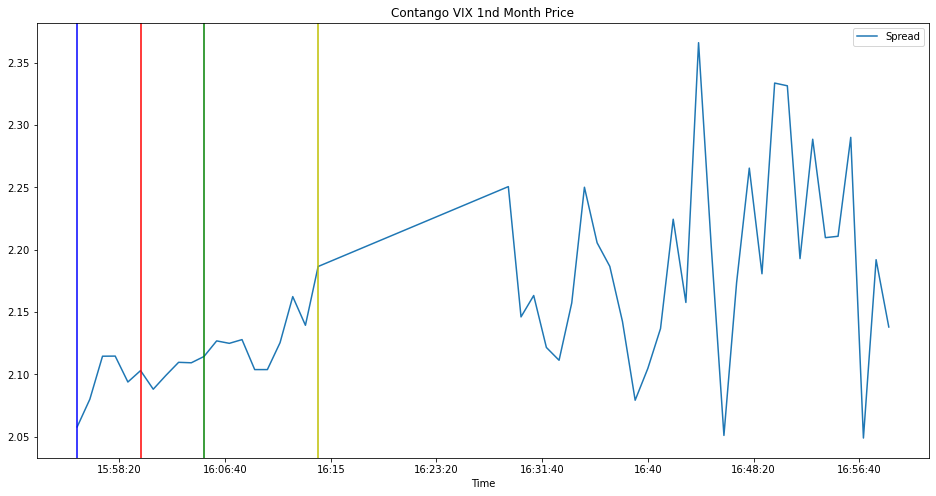

In [56]:
UX12extendedContango
ContExt=UX12extendedContango.groupby('Time').mean()
ContExt[['Spread']].plot(figsize=(16,8),label='UX1')
plt.title('Contango VIX 1nd Month Price')
plt.axvline('15:55:00', color='b')
plt.axvline('16:00:00', color='r')
plt.axvline('16:14:00', color='y')
plt.axvline('16:05:00', color='g')
#plt.show()

In [59]:
UX12extendedContango['Date']=UX12extendedContango.index.date

<ipython-input-59-53393295bdeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX12extendedContango['Date']=UX12extendedContango.index.date


In [382]:
a=UX12extendedContango.at_time('15:55').set_index('Date')['Spread']
b=UX12extendedContango.at_time('16:00').set_index('Date')['Spread']
c=UX12extendedContango.at_time('16:05').set_index('Date')['Spread']
d=UX12extendedContango.at_time('16:14').set_index('Date')['Spread']
f=finalUXV.at_time('09:31').set_index('Date')['CloseVVIX']
g=finalUXV.at_time('15:55').set_index('Date')['CloseVVIX']
h=finalUXV.at_time('12:00').set_index('Date')['CloseVVIX']
contangostat=pd.concat([a,b,c,d,f,h,g],axis=1,join='inner')
contangostat.columns=['State1','State2','State3','Closing','VVIX09:31','VVIX12:00','VVIX15:55']
contangostat['Singal']=(contangostat['VVIX15:55']/contangostat['VVIX09:31'])-1
contangostat['Long at 15:55']=contangostat['Closing']-contangostat['State1']
contangostat['Long at 16:00']=contangostat['Closing']-contangostat['State2']
contangostat['Long at 16:05']=contangostat['Closing']-contangostat['State3']


In [383]:
finalUXV['CloseVVIXma']=finalUXV['CloseVVIX'].rolling(390).mean()

In [429]:
contangostat[contangostat['VVIX09:31']>130]

,State1,State2,State3,Closing,VVIX09:31,VVIX12:00,VVIX15:55,Singal,Long at 15:55,Long at 16:00,Long at 16:05
Date,,,,,,,,,,,
2020-05-15,0.65,0.85,0.80,0.55,140.48,137.08,131.4,-0.064636,-0.10,-0.3,-0.25
2020-09-08,4.87,4.90,4.87,4.40,130.26,126.39,123.7,-0.050361,-0.47,-0.5,-0.47


In [435]:
contangostat[contangostat['VVIX12:00']>130]

,State1,State2,State3,Closing,VVIX09:31,VVIX12:00,VVIX15:55,Singal,Long at 15:55,Long at 16:00,Long at 16:05
Date,,,,,,,,,,,
2020-05-15,0.65,0.85,0.8,0.55,140.48,137.08,131.4,-0.064636,-0.1,-0.3,-0.25


In [452]:
contangostat[contangostat['VVIX09:31']<130]['Long at 15:55']

Date
2020-05-18   -0.10
2020-05-19    0.47
2020-05-21   -0.01
2020-05-22    0.16
2020-05-26    0.17
              ... 
2020-11-06    0.00
2020-11-09   -0.25
2020-11-10    0.15
2020-11-11   -0.32
2020-11-12    0.12
Name: Long at 15:55, Length: 94, dtype: float64

In [448]:
contangostat[contangostat['VVIX09:31']>130]['Long at 15:55']

Date
2020-05-15   -0.10
2020-09-08   -0.47
Name: Long at 15:55, dtype: float64

In [409]:
m=9
d=11
beg=datetime.datetime(2020,m,d,9,31)
end=datetime.datetime(2020,m,d,15,55)
aZ=datetime.datetime(2020,m,d,19,55)#CHANGE TO 20:55 AFTER DAY IGHT SAVING HOUR
aT=datetime.datetime(2020,m,d,19,0)
beg1=datetime.datetime(2020,m,d,9,45)
begext=datetime.datetime(2020,m,d,15,55)
endext=datetime.datetime(2020,m,d,16,14)

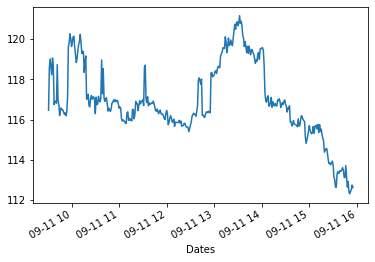

In [410]:
finalUXV.loc[beg:end]['CloseVVIX'].plot()

In [240]:
UXVVIXContango['Date']=UXVVIXContango.index.date
UXVVIXContangoext['Date']=UXVVIXContangoext.index.date

<ipython-input-240-62f384a0d270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UXVVIXContango['Date']=UXVVIXContango.index.date
<ipython-input-240-62f384a0d270>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UXVVIXContangoext['Date']=UXVVIXContangoext.index.date


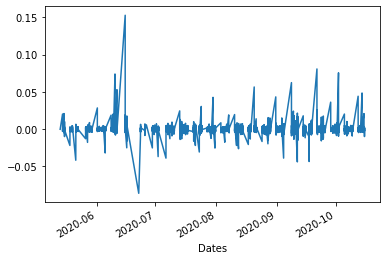

In [243]:
UXVVIXContango['VVIX'].pct_change().plot()

### ATR Strategy Development

In [2432]:
contangostat.to_excel('C:\\Users\\raymond.widjaja\\Desktop\\VIX\\statistics.xlsx')

In [68]:
contangostatt

,State1,State2,State3,Closing,ATR15:00,ATR15:55,Singal,Long at 15:55,Long at 16:00,Long at 16:05
Date,,,,,,,,,,
2020-05-08,1.30,1.33,1.30,1.36,0.075093,0.118432,0.577135,0.06,0.03,0.06
2020-05-11,1.17,1.15,1.15,1.21,0.093130,0.155761,0.672519,0.04,0.06,0.06
2020-05-19,0.85,0.95,0.86,1.32,0.249474,0.397269,0.592426,0.47,0.37,0.46
2020-05-22,0.54,0.60,0.59,0.70,0.074188,0.132838,0.790561,0.16,0.10,0.11
2020-05-26,0.65,0.76,0.76,0.82,0.073446,0.165228,1.249643,0.17,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...
2020-10-20,0.71,0.60,0.40,0.70,0.093475,0.189404,1.026256,-0.01,0.10,0.30
2020-11-04,0.55,0.67,0.66,0.55,0.126856,0.178262,0.405232,0.00,-0.12,-0.11
2020-11-05,0.93,0.92,0.95,0.95,0.084909,0.172732,1.034309,0.02,0.03,0.00


In [67]:
#Change in ATR in the last hour is greater than 0.2
contangostatt=contangostat[contangostat['Singal']>0.2]

In [114]:
contangostat

,State1,State2,State3,Closing,ATR15:00,ATR15:55,Singal,Long at 15:55,Long at 16:00,Long at 16:05
Date,,,,,,,,,,
2020-05-07,0.20,0.20,0.30,0.51,0.132811,0.149329,0.124376,0.31,0.31,0.21
2020-05-08,1.30,1.33,1.30,1.36,0.075093,0.118432,0.577135,0.06,0.03,0.06
2020-05-11,1.17,1.15,1.15,1.21,0.093130,0.155761,0.672519,0.04,0.06,0.06
2020-05-15,0.65,0.85,0.80,0.55,0.207436,0.230634,0.111834,-0.10,-0.30,-0.25
2020-05-18,1.30,1.11,0.98,1.20,0.133655,0.147596,0.104309,-0.10,0.09,0.22
...,...,...,...,...,...,...,...,...,...,...
2020-11-05,0.93,0.92,0.95,0.95,0.084909,0.172732,1.034309,0.02,0.03,0.00
2020-11-06,1.75,1.63,1.58,1.75,0.125648,0.150646,0.198949,0.00,0.12,0.17
2020-11-09,0.85,0.85,0.80,0.60,0.138758,0.284112,1.047531,-0.25,-0.25,-0.20


In [2510]:
contangostatt2=contangostat[((contangostat['Singal']<-0.2))] #change in the ATR in the last hour is least than 0.2

In [72]:
model=sm.OLS(contangostat['Long at 15:55'],sm.add_constant(contangostat['Singal']))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Long at 15:55   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6114
Date:                Thu, 26 Nov 2020   Prob (F-statistic):              0.436
Time:                        09:48:51   Log-Likelihood:                 24.420
No. Observations:                 103   AIC:                            -44.84
Df Residuals:                     101   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0537      0.029      1.863      0.065      -0.003       0.111
Singal         0.0324      0.041      0.782      0.436      -0.050       0.115
==============================================================================
Omnibus:                       33.600   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.513
Skew:                           1.124   Prob(JB):                     3.00e-21
Kurtosis:                       7.119   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Long (modified a bit->depend on the strategy)

In [73]:
contSUM=pd.concat([fm_summary(contangostatt['Long at 15:55']),fm_summary(contangostatt['Long at 16:00']),fm_summary(contangostatt['Long at 16:05'])],axis=1)
contSUM.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUM=contSUM.round(3)
contSUM.style.set_caption("CONTANGO")

,Long 15:55,Long 16:00,Long 16:05
count,78.000000,78.000000,78.000000
mean,0.094000,0.081000,0.067000
Up,58.000000,57.000000,53.000000
Down,19.000000,17.000000,20.000000
breakeven,1.000000,4.000000,5.000000
Up Mean,0.157000,0.144000,0.139000
Down Mean,-0.092000,-0.112000,-0.107000
Up Median,0.110000,0.100000,0.080000
Down Median,-0.060000,-0.120000,-0.080000
Up(%),0.744000,0.731000,0.679000


### Short

In [2511]:
contSUM2=pd.concat([fm_summary(contangostatt2['Long at 15:55']),fm_summary(contangostatt2['Long at 16:00']),fm_summary(contangostatt2['Long at 16:05'])],axis=1)
contSUM2.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUM2=contSUM2.round(3)
contSUM2.style.set_caption("CONTANGO")

,Long 15:55,Long 16:00,Long 16:05
count,2.000000,2.000000,2.000000
mean,-0.035000,-0.095000,0.000000
Up,1.000000,0.000000,1.000000
Down,1.000000,2.000000,1.000000
breakeven,0.000000,0.000000,0.000000
Up Mean,0.060000,nan,0.050000
Down Mean,-0.130000,-0.095000,-0.050000
Up Median,0.060000,nan,0.050000
Down Median,-0.130000,-0.095000,-0.050000
Up(%),0.500000,0.000000,0.500000


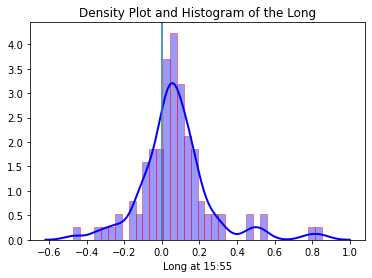

In [74]:
sns.distplot(contangostat['Long at 15:55'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2})
plt.title('Density Plot and Histogram of the Long')
plt.axvline(0)


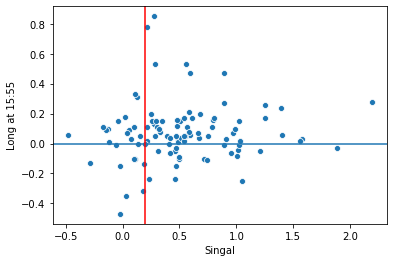

In [2616]:
sns.scatterplot(contangostat['Singal'],contangostat['Long at 15:55'])
plt.axhline(0)
plt.axvline(0.2,color='red')

### With bid ask spread

In [126]:
contbidask['bidasktotalspread']=((contbidask['Ask1']-contbidask['Bid1'])+(contbidask['Ask2']-contbidask['Bid2']))/2
contbidask['bidasktotalspread']

Dates
2020-05-07 15:55:00-04:00    0.050
2020-05-07 16:00:00-04:00    0.050
2020-05-07 16:01:00-04:00    0.050
2020-05-07 16:02:00-04:00    0.050
2020-05-07 16:03:00-04:00    0.050
                             ...  
2020-11-12 16:53:00-05:00    0.050
2020-11-12 16:54:00-05:00    0.050
2020-11-12 16:55:00-05:00    0.050
2020-11-12 16:57:00-05:00    0.050
2020-11-12 16:59:00-05:00    0.075
Name: bidasktotalspread, Length: 4383, dtype: float64

In [127]:
contbidask[contbidask['bidasktotalspread']<0].head(5)

,Spread,Bid1,Ask1,Bid2,Ask2,bidasktotalspread
Dates,,,,,,
2020-05-14 16:14:00-04:00,0.51,32.50,32.40,32.90,32.95,-0.025
2020-05-19 16:14:00-04:00,1.32,32.20,32.05,31.75,31.80,-0.050
2020-05-21 16:14:00-04:00,0.55,31.00,31.05,31.60,31.50,-0.025
2020-06-01 16:14:00-04:00,1.20,29.55,29.50,30.75,30.75,-0.025
2020-06-08 16:14:00-04:00,1.88,26.10,26.00,27.95,27.90,-0.075


In [128]:
aS=contbidask.at_time('15:55')
bS=contbidask.at_time('16:00')
cS=contbidask.at_time('16:05')
dS=contbidask.at_time('16:14')
eS=contbidask.at_time('16:12')
aS=aS['bidasktotalspread']
bS=bS['bidasktotalspread']
cS=cS['bidasktotalspread']
dS=dS['bidasktotalspread']
eS=eS['bidasktotalspread']
aS.index=aS.index.date
bS.index=bS.index.date
cS.index=cS.index.date
dS.index=dS.index.date
eS.index=eS.index.date

### ATR strategy development

### Long

In [129]:
contangostatS=pd.concat([contangostatt,aS,bS,cS,dS,eS],axis=1,join='inner') #Slight change contangstatt / contangostat
list2=contangostat.columns.tolist()
list2.append('bs1')
list2.append('bs2')
list2.append('bs3')
list2.append('bs4')
list2.append('bs5')
contangostatS.columns=list2

In [130]:
contangostatS['Long at 15:55 w/ spread']=contangostatS['Long at 15:55']-(contangostatS['bs1']+contangostatS['bs4'])
contangostatS['Long at 16:00 w/ spread']=contangostatS['Long at 16:00']-(contangostatS['bs2']+contangostatS['bs4'])
contangostatS['Long at 16:05 w/ spread']=contangostatS['Long at 16:05']-(contangostatS['bs3']+contangostatS['bs4'])


In [131]:
contangostatS['Long at 15:55 pct change']=contangostatS['Long at 15:55 w/ spread']/contangostatS['State1']


In [121]:
contangostatmodel1=contangostatS.copy()

In [133]:
contangostatmodel2=contangostatS.copy()

## Backtest Summary

In [82]:
def fm_summaryS(p,p2):#Summary Statistics Function
    t=pd.Series((v for v in p ))
    t2=pd.Series((w for w in p2))
    s = t.describe().T
    t3=pd.concat([t[t>0],t2],axis=1,join='inner') #Up
    t3[1]
    t4=pd.concat([t[t<0],t2],axis=1,join='inner') #Down
    
    s['Up Mean']=t3[1].mean()
    s['Down Mean']=t4[1].mean()
    s['Up Median']=t3[1].median()
    s['Down Median']=t4[1].median()
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    s['Up']=t[t>0].count()
    s['Down']=t[t<0].count()
    s['breakeven']=t[t==0].count()
    s['Up(%)']=t[t>0].count()/s['count']
    s['Down(%)']=t[t<0].count()/s['count']
    s['Expected Value']=(s['Up(%)']*s['Up Mean'])+(s['Down Mean']*s['Down(%)'])
    return s[['count','mean','Up','Down','breakeven','Up Mean','Down Mean','Up Median','Down Median','Up(%)','Down(%)','Expected Value']].T


In [83]:
pd.concat([contangostatt2,aS,bS,cS,dS,eS],axis=1,join='inner')

NameError: name 'contangostatt2' is not defined

In [84]:
def losedate(p1):
    ldate=p1[p1['Long at 15:55']<0].index.tolist()
    return ldate
    

In [134]:
contSUMbidask=pd.concat([fm_summaryS(contangostatS['Long at 15:55'],contangostatS['Long at 15:55 w/ spread']),fm_summaryS(contangostatS['Long at 16:00'],contangostatS['Long at 16:00 w/ spread']),fm_summaryS(contangostatS['Long at 16:05'],contangostatS['Long at 16:05 w/ spread'])],axis=1)
contSUMbidask.columns=['Long 15:55 w/S','Long 16:00 w/S','Long 16:05 w/S']
contSUMbidask=contSUMbidask.round(4)
contSUMbidask.style.set_caption("CONTANGO with average spread [ Assume we just take LONG position when change in ATR>0.2 ]")

,Long 15:55 w/S,Long 16:00 w/S,Long 16:05 w/S
count,78.000000,78.000000,78.000000
mean,0.094200,0.080900,0.067300
Up,58.000000,57.000000,53.000000
Down,19.000000,17.000000,20.000000
breakeven,1.000000,4.000000,5.000000
Up Mean,0.092200,0.082200,0.078100
Down Mean,-0.169700,-0.200000,-0.194500
Up Median,0.042500,0.025000,0.020000
Down Median,-0.150000,-0.195000,-0.177500
Up(%),0.743600,0.730800,0.679500


In [2593]:
import pyfolio as pf

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
pyfolio as 

In [2599]:
stratret=contangostatS['Long at 15:55 pct change'].copy()
stratret.index=pd.to_datetime(stratret.index).tz_localize('US/Eastern')

In [88]:
contangostatS['cumret15:55']=(1+contangostatS['Long at 15:55 pct change']).cumprod()

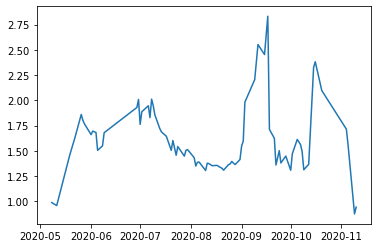

In [89]:
contangostatS['cumret15:55'].plot()

In [104]:
contangostatS.iloc[:-5,:]['Long at 15:55 pct change'].mean()/contangostatS.iloc[:-5,:]['Long at 15:55 pct change'].std()*np.sqrt(252)


2.338568888452021

1.8546084457724685

In [137]:
portRetSummary=pd.DataFrame(columns=['Strategy 1 Long','Strategy 1 Long with ATR'],index=['Avg Ret','Std dev','Sharpe'])
avg1=contangostatmodel1.iloc[:-5,:]['Long at 15:55 pct change'].mean()f
std1=contangostatmodel1.iloc[:-5,:]['Long at 15:55 pct change'].std()
avg2=contangostatmodel2.iloc[:-5,:]['Long at 15:55 pct change'].mean()*np.sqrt(252)
std2=contangostatmodel2.iloc[:-5,:]['Long at 15:55 pct change'].std()
portRetSummary[portRetSummary.columns[0]]=[avg1,std1,avg1/std1]
portRetSummary[portRetSummary.columns[1]]=[avg2,std2,avg2/std2]


In [138]:
portRetSummary

,Strategy 1 Long,Strategy 1 Long with ATR
Avg Ret,0.358118,0.314235
Std dev,0.193096,0.134371
Sharpe,1.854608,2.338569


# =====================

In [90]:
contSUMbidask=pd.concat([fm_summaryS(contangostatS['Long at 15:55'],contangostatS['Long at 15:55 w/ spread']),fm_summaryS(contangostatS['Long at 16:00'],contangostatS['Long at 16:00 w/ spread']),fm_summaryS(contangostatS['Long at 16:05'],contangostatS['Long at 16:05 w/ spread'])],axis=1)
contSUMbidask.columns=['Long 15:55 w/S','Long 16:00 w/S','Long 16:05 w/S']
contSUMbidask=contSUMbidask.round(4)
contSUMbidask.style.set_caption("CONTANGO with average spread [ Assume we just take LONG position ]")

,Long 15:55 w/S,Long 16:00 w/S,Long 16:05 w/S
count,78.000000,78.000000,78.000000
mean,0.094200,0.080900,0.067300
Up,58.000000,57.000000,53.000000
Down,19.000000,17.000000,20.000000
breakeven,1.000000,4.000000,5.000000
Up Mean,0.092200,0.082200,0.078100
Down Mean,-0.169700,-0.200000,-0.194500
Up Median,0.042500,0.025000,0.020000
Down Median,-0.150000,-0.195000,-0.177500
Up(%),0.743600,0.730800,0.679500


<ipython-input-62-b62f1a340d46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX12Contango['ATR']=ta.ATR((UX12Contango['High2']-UX12Contango['High']),(UX12Contango['Low2']-UX12Contango['Low']),(UX12Contango['Close2']-UX12Contango['Close']),timeperiod=14)


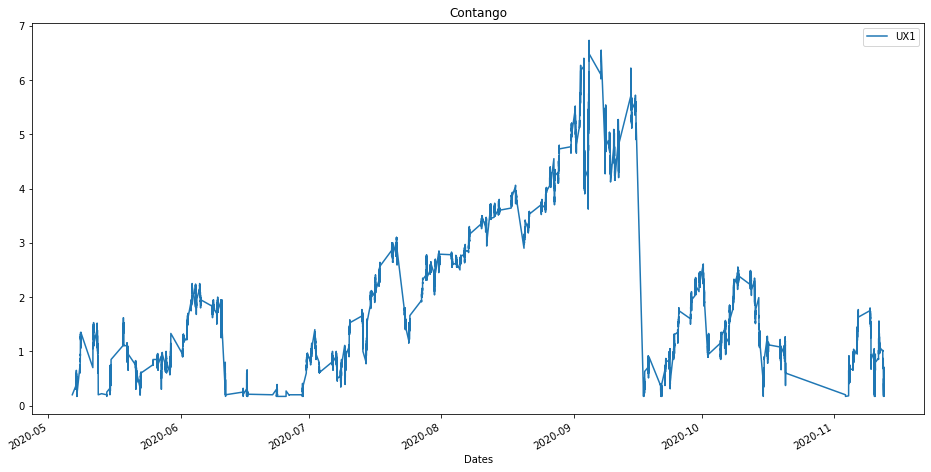

In [62]:

UX12Contango['ATR']=ta.ATR((UX12Contango['High2']-UX12Contango['High']),(UX12Contango['Low2']-UX12Contango['Low']),(UX12Contango['Close2']-UX12Contango['Close']),timeperiod=14)
UX12Contango['Spread'].plot(figsize=(16,8),label='UX1')
plt.legend()
plt.title('Contango')
plt.show()

In [238]:
UX12Contango

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Open2,...,Number Ticks2,Volatility2,Time2,Spread,Date,ATR,ATR2,SpreadH,SpreadL,ATRSpread
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:53:00-04:00,33.20,33.20,33.20,33.15,1560.2402,47,14,0.001507,13:53:00,33.31,...,14,0.002999,13:53:00,0.20,2020-05-06,NaN,NaN,0.25,0.10,NaN
2020-05-07 09:30:00-04:00,32.80,32.86,32.90,32.79,6275.8193,191,99,0.003349,09:30:00,33.20,...,78,0.002107,09:30:00,0.36,2020-05-07,NaN,NaN,0.46,0.28,NaN
2020-05-07 09:31:00-04:00,32.90,33.00,33.01,32.85,7707.8506,234,152,0.004859,09:31:00,33.25,...,119,0.004508,09:31:00,0.30,2020-05-07,NaN,NaN,0.50,0.19,NaN
2020-05-07 09:32:00-04:00,32.99,32.80,33.00,32.74,7550.3008,230,131,0.007910,09:32:00,33.30,...,135,0.006022,09:32:00,0.35,2020-05-07,NaN,NaN,0.57,0.11,NaN
2020-05-07 09:33:00-04:00,32.80,32.85,32.85,32.75,3347.8599,102,63,0.003049,09:33:00,33.17,...,52,0.001507,09:33:00,0.35,2020-05-07,NaN,NaN,0.45,0.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 15:56:00-05:00,26.03,26.05,26.05,25.95,6761.1099,260,121,0.003846,15:56:00,26.63,...,147,0.003759,15:56:00,0.56,2020-11-12,0.166635,0.134199,0.70,0.50,0.273868
2020-11-12 15:57:00-05:00,26.06,25.95,26.06,25.93,7035.1699,271,145,0.005001,15:57:00,26.62,...,229,0.005644,15:57:00,0.65,2020-11-12,0.164018,0.135328,0.72,0.44,0.274306
2020-11-12 15:58:00-05:00,25.95,25.86,25.95,25.80,28806.4590,1112,368,0.005797,15:58:00,26.60,...,473,0.003759,15:58:00,0.71,2020-11-12,0.163017,0.132805,0.85,0.60,0.272570


<ipython-input-63-da4a407b0a8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX12Contango['ATR']=ta.ATR(UX12Contango['High'],UX12Contango['Low'],UX12Contango['Close'],timeperiod=14)
<ipython-input-63-da4a407b0a8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX12Contango['ATR2']=ta.ATR(UX12Contango['High2'],UX12Contango['Low2'],UX12Contango['Close2'],timeperiod=14)
<ipython-input-63-da4a407b0a8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

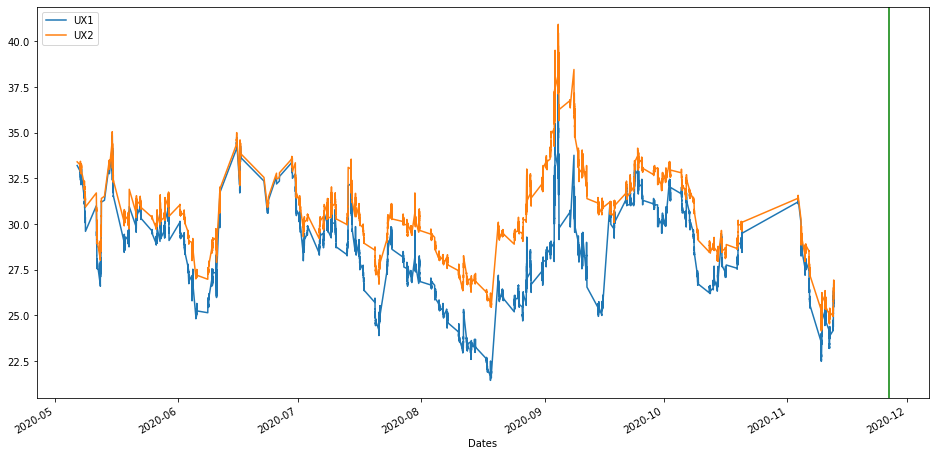

In [63]:
#ATR spread calculuation 
UX12Contango['Close'].plot(figsize=(16,8),label='UX1')
UX12Contango['Close2'].plot(figsize=(16,8),label='UX2')
UX12Contango['ATR']=ta.ATR(UX12Contango['High'],UX12Contango['Low'],UX12Contango['Close'],timeperiod=14)
UX12Contango['ATR2']=ta.ATR(UX12Contango['High2'],UX12Contango['Low2'],UX12Contango['Close2'],timeperiod=14)
UX12Contango['SpreadH']=UX12Contango['High2']-UX12Contango['Low']
UX12Contango['SpreadL']=UX12Contango['Low2']-UX12Contango['High']
UX12Contango['ATRSpread']=ta.ATR(UX12Contango['SpreadH'],UX12Contango['SpreadL'],UX12Contango['Spread'],timeperiod=14)
plt.legend()
plt.axvline('15:55', color='g')
plt.show()


### Change datetime index to date

In [2123]:
testCT=UX12Contango.copy()

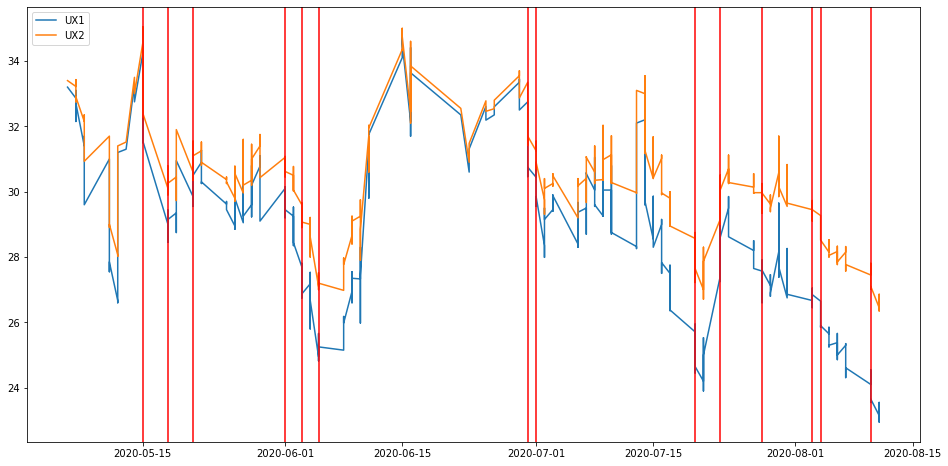

In [1463]:
testCT.index=testCT.index.date
testCT
testCT['Close'].iloc[:20000].plot(figsize=(16,8),label='UX1')
testCT['Close2'].iloc[:20000].plot(figsize=(16,8),label='UX2')

plt.axvline(lodate[0], color='r')
plt.axvline(lodate[1], color='r')
plt.axvline(lodate[2], color='r')
plt.axvline(lodate[3], color='r')
plt.axvline(lodate[4], color='r')
plt.axvline(lodate[5], color='r')
plt.axvline(lodate[6], color='r')
plt.axvline(lodate[7], color='r')
plt.axvline(lodate[8], color='r')
plt.axvline(lodate[9], color='r')
plt.axvline(lodate[10], color='r')
plt.axvline(lodate[11], color='r')
plt.axvline(lodate[12], color='r')
plt.axvline(lodate[13], color='r')
#for i in lodate:
    #plt.axvline(i, color='r')
    
plt.legend()

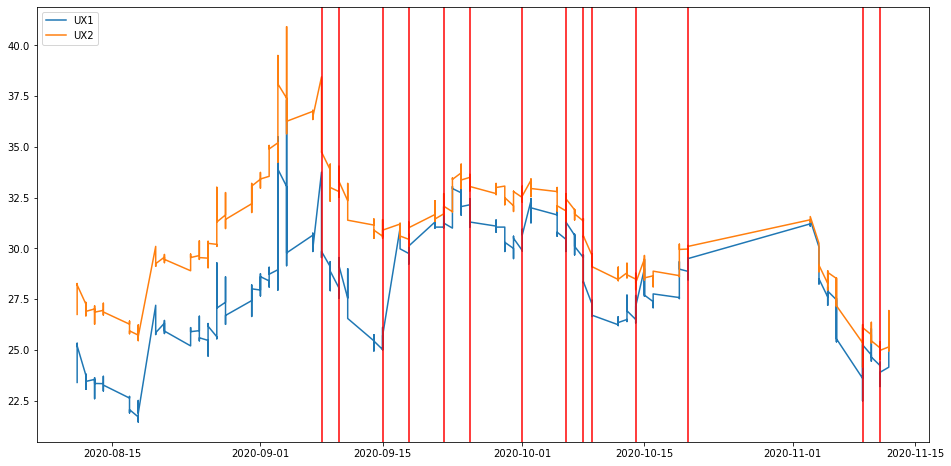

In [1466]:
testCT
testCT['Close'].iloc[20000:].plot(figsize=(16,8),label='UX1')
testCT['Close2'].iloc[20000:].plot(figsize=(16,8),label='UX2')

plt.axvline(lodate[14], color='r')
plt.axvline(lodate[15], color='r')
plt.axvline(lodate[16], color='r')
plt.axvline(lodate[17], color='r')
plt.axvline(lodate[18], color='r')
plt.axvline(lodate[19], color='r')
plt.axvline(lodate[20], color='r')
plt.axvline(lodate[21], color='r')
plt.axvline(lodate[22], color='r')
plt.axvline(lodate[23], color='r')
plt.axvline(lodate[24], color='r')
plt.axvline(lodate[25], color='r')
plt.axvline(lodate[26], color='r')
plt.axvline(lodate[27], color='r')
#for i in lodate:
    #plt.axvline(i, color='r')
    
plt.legend()

In [2365]:
contangostat

,State1,State2,State3,Closing,Closing2,Long at 15:55,Long at 16:00,Long at 16:05,Long at 15:55 (2),Long at 16:00 (2),Long at 16:05 (2)
Date,,,,,,,,,,,
2020-05-07,0.20,0.20,0.30,0.51,0.30,0.31,0.31,0.21,0.10,0.10,7.105427e-15
2020-05-08,1.30,1.33,1.30,1.36,1.32,0.06,0.03,0.06,0.02,-0.01,2.000000e-02
2020-05-11,1.17,1.15,1.15,1.21,1.10,0.04,0.06,0.06,-0.07,-0.05,-5.000000e-02
2020-05-14,0.19,0.25,0.31,0.51,0.42,0.32,0.26,0.20,0.23,0.17,1.100000e-01
2020-05-15,0.65,0.85,0.80,0.55,0.60,-0.10,-0.30,-0.25,-0.05,-0.25,-2.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-06,1.75,1.63,1.58,1.75,1.79,0.00,0.12,0.17,0.04,0.16,2.100000e-01
2020-11-09,0.85,0.85,0.80,0.60,0.70,-0.25,-0.25,-0.20,-0.15,-0.15,-1.000000e-01
2020-11-10,0.65,0.80,0.75,0.80,0.78,0.15,0.00,0.05,0.13,-0.02,3.000000e-02


In [1458]:
lodate=losedate(contangostatS)


In [1428]:
losses=pd.DataFrame(pd.DatetimeIndex(lodate).dayofweek.tolist(),columns=['Day'])
losses['Down']=1
losses.groupby('Day').count()

,Down
Day,
0,6
1,8
2,4
3,5
4,5


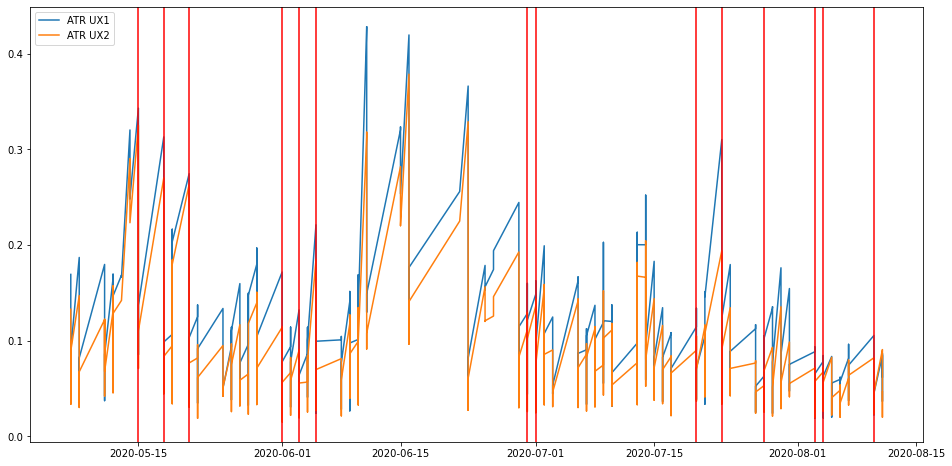

In [1453]:
testCT['ATR'].iloc[:20000].plot(figsize=(16,8),label='ATR UX1')
testCT['ATR2'].iloc[:20000].plot(figsize=(16,8),label='ATR UX2')
plt.legend()
#for i in lodate:
    #plt.axvline(i, color='r')
plt.axvline(lodate[0], color='r')
plt.axvline(lodate[1], color='r')
plt.axvline(lodate[2], color='r')
plt.axvline(lodate[3], color='r')
plt.axvline(lodate[4], color='r')
plt.axvline(lodate[5], color='r')
plt.axvline(lodate[6], color='r')
plt.axvline(lodate[7], color='r')
plt.axvline(lodate[8], color='r')
plt.axvline(lodate[9], color='r')
plt.axvline(lodate[10], color='r')
plt.axvline(lodate[11], color='r')
plt.axvline(lodate[12], color='r')
plt.axvline(lodate[13], color='r')

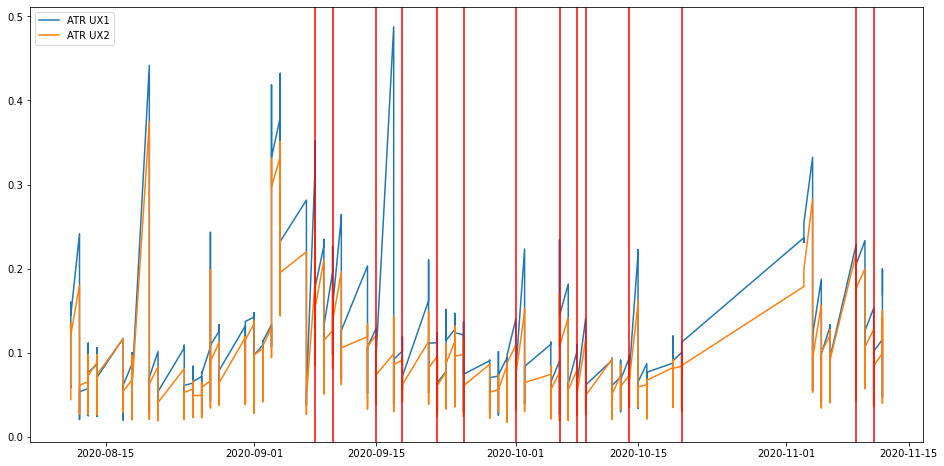

In [1456]:
testCT['ATR'].iloc[20000:].plot(figsize=(16,8),label='ATR UX1')
testCT['ATR2'].iloc[20000:].plot(figsize=(16,8),label='ATR UX2')
plt.legend()
#for i in lodate:
    #plt.axvline(i, color='r')
plt.axvline(lodate[14], color='r')
plt.axvline(lodate[15], color='r')
plt.axvline(lodate[16], color='r')
plt.axvline(lodate[17], color='r')
plt.axvline(lodate[18], color='r')
plt.axvline(lodate[19], color='r')
plt.axvline(lodate[20], color='r')
plt.axvline(lodate[21], color='r')
plt.axvline(lodate[22], color='r')
plt.axvline(lodate[23], color='r')
plt.axvline(lodate[24], color='r')
plt.axvline(lodate[25], color='r')
plt.axvline(lodate[26], color='r')
plt.axvline(lodate[27], color='r')


## ATR ANALYSIS

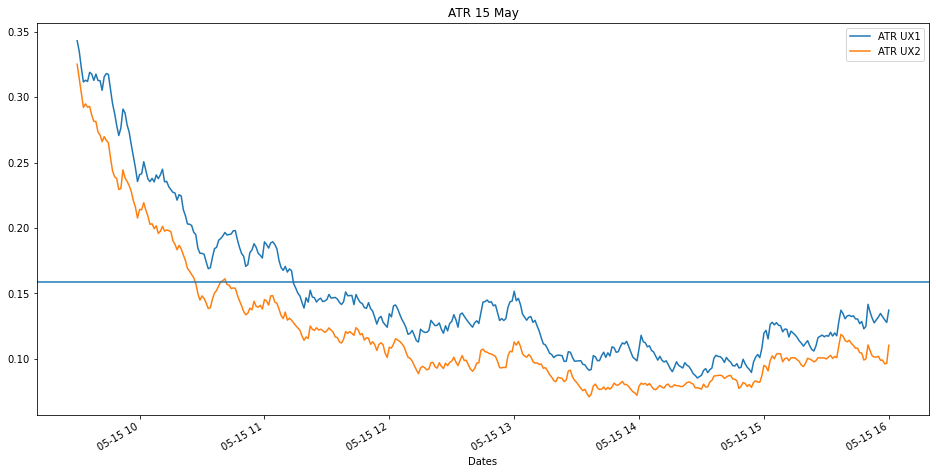

In [1590]:
UX12Contango['ATR'].loc[datetime.datetime(2020,5,15,9,30):datetime.datetime(2020,5,15,16,0)].plot(figsize=(16,8),label='ATR UX1')
UX12Contango['ATR2'].loc[datetime.datetime(2020,5,15,9,30):datetime.datetime(2020,5,15,16,0)].plot(figsize=(16,8),label='ATR UX2')
plt.title('ATR 15 May')
plt.axhline(UX12Contango['ATR'].loc[datetime.datetime(2020,5,15,9,45)]/2)
plt.legend()

## ATR SPREAD

In [387]:
m=9
d=11
beg=datetime.datetime(2020,m,d,9,31)
end=datetime.datetime(2020,m,d,15,55)
aZ=datetime.datetime(2020,m,d,19,55)#CHANGE TO 20:55 AFTER DAY IGHT SAVING HOUR
aT=datetime.datetime(2020,m,d,19,0)
beg1=datetime.datetime(2020,m,d,9,45)
begext=datetime.datetime(2020,m,d,15,55)
endext=datetime.datetime(2020,m,d,16,14)

In [323]:
UXVVIXContango

,VVIX,UX1,UX2,SVXY,UVXY,Spread,Date
Dates,,,,,,,
2020-05-13 10:31:00-04:00,135.53,31.30,31.52,33.40,38.0000,0.22,2020-05-13
2020-05-13 10:33:00-04:00,135.51,31.30,31.52,33.42,37.9900,0.22,2020-05-13
2020-05-14 15:45:00-04:00,138.26,33.30,33.50,32.36,41.5000,0.20,2020-05-14
2020-05-14 15:49:00-04:00,138.16,33.16,33.37,32.40,41.3300,0.21,2020-05-14
2020-05-14 15:50:00-04:00,138.39,33.10,33.35,32.42,41.2100,0.25,2020-05-14
...,...,...,...,...,...,...,...
2020-10-15 15:55:00-04:00,117.90,27.79,28.51,37.49,16.6500,0.72,2020-10-15
2020-10-15 15:56:00-04:00,117.97,27.80,28.56,37.48,16.6846,0.76,2020-10-15
2020-10-15 15:57:00-04:00,118.11,27.78,28.57,37.47,16.6800,0.79,2020-10-15


In [297]:
UXVVIXContango[UXVVIXContango['VVIX']>130]['Date'].unique()

array([datetime.date(2020, 5, 13), datetime.date(2020, 5, 14),
       datetime.date(2020, 5, 15), datetime.date(2020, 6, 15),
       datetime.date(2020, 6, 16), datetime.date(2020, 6, 22),
       datetime.date(2020, 6, 23), datetime.date(2020, 9, 3),
       datetime.date(2020, 9, 4), datetime.date(2020, 9, 8)], dtype=object)

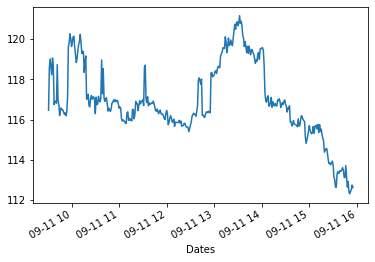

In [391]:
finalUXV.loc[beg:end]['CloseVVIX'].plot()

In [315]:
UXVVIXContangoext.loc[begext:endext]

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

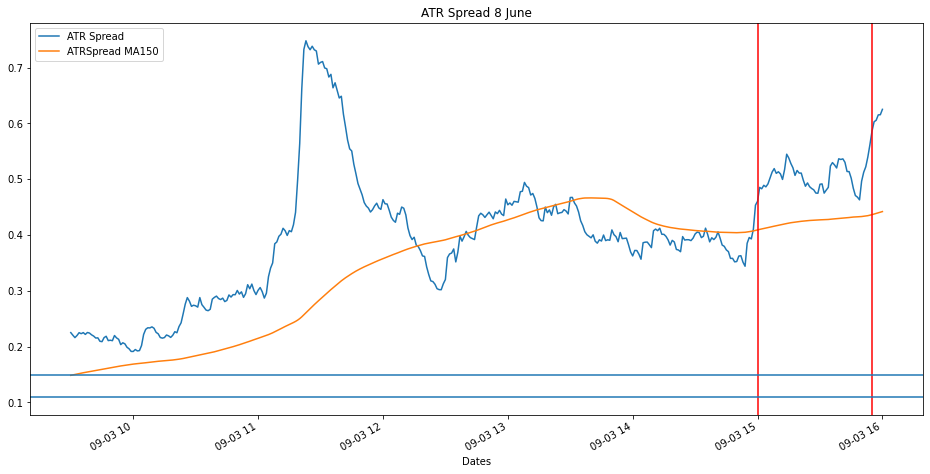

In [2434]:
UX12Contango['ATRSpread'].loc[beg:end].plot(figsize=(16,8),label='ATR Spread') 
plt.title('ATR Spread 8 June')
#plt.axhline(UX12Contango['ATRSpread'].loc[beg1]/2)
UX12Contango['ATRSpread'].rolling(150).mean().loc[beg:end].plot(figsize=(16,8),label='ATRSpread MA150') 
plt.legend()
plt.axvline(aZ,color='r')
plt.axvline(aT,color='r')
plt.axhline(0.11)
plt.axhline(0.15)

In [2354]:
UX12Contango['ATRSpread'].loc[beg:end].tail(7)

Dates
2020-09-10 15:54:00-04:00    0.311532
2020-09-10 15:55:00-04:00    0.306422
2020-09-10 15:56:00-04:00    0.300249
2020-09-10 15:57:00-04:00    0.298803
2020-09-10 15:58:00-04:00    0.291031
2020-09-10 15:59:00-04:00    0.286672
2020-09-10 16:00:00-04:00    0.290481
Name: ATRSpread, dtype: float64

In [ ]:
0.297

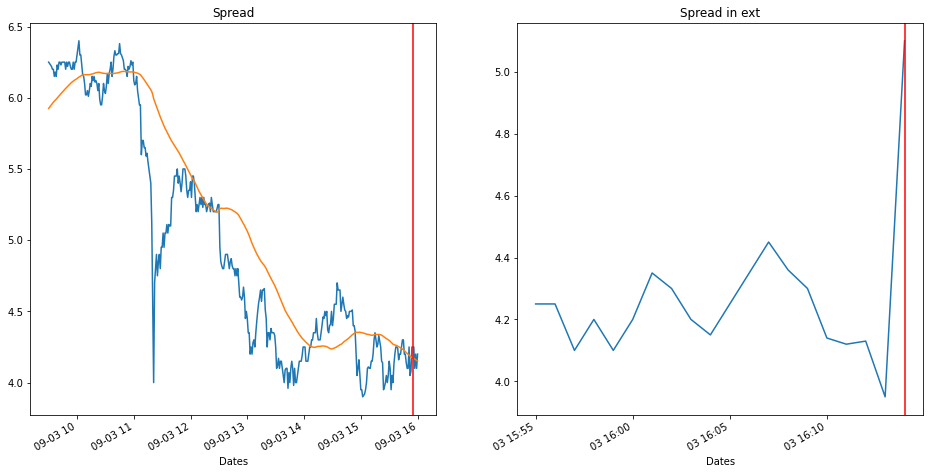

In [2435]:
plt.subplot(1,2,1)
UX12Contango['Spread'].loc[beg:end].plot(figsize=(16,8))
plt.title('Spread')
UX12Contango['Spread'].rolling(70).mean().loc[beg:end].plot(figsize=(16,8))
ag=datetime.datetime(2020,m,d,19,55)
plt.axvline(ag,color='r')
plt.subplot(1,2, 2)
UX12extendedContango['Spread'].loc[begext:endext].plot(figsize=(16,8))
plt.title('Spread in ext')
aT=datetime.datetime(2020,m,d,20,14)  # 21:`13AFTER DLIGHT SAVING
plt.axvline(aT,color='r')

In [2286]:
UX12Contango['Spread'].rolling(90).mean().loc[beg:end].tail(7)

Dates
2020-06-04 15:54:00-04:00    1.923444
2020-06-04 15:55:00-04:00    1.921444
2020-06-04 15:56:00-04:00    1.919333
2020-06-04 15:57:00-04:00    1.917444
2020-06-04 15:58:00-04:00    1.915667
2020-06-04 15:59:00-04:00    1.914000
2020-06-04 16:00:00-04:00    1.912111
Name: Spread, dtype: float64

In [2141]:
UX12Contango

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Open2,...,Volume2,Number Ticks2,Volatility2,Time2,Spread,ATR,ATR2,SpreadH,SpreadL,ATRSpread
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:53:00-04:00,33.20,33.20,33.20,33.15,1560.2402,47,14,0.001507,13:53:00,33.31,...,18,14,0.002999,13:53:00,0.20,NaN,NaN,0.25,0.10,NaN
2020-05-07 09:30:00-04:00,32.80,32.86,32.90,32.79,6275.8193,191,99,0.003349,09:30:00,33.20,...,98,78,0.002107,09:30:00,0.36,NaN,NaN,0.46,0.28,NaN
2020-05-07 09:31:00-04:00,32.90,33.00,33.01,32.85,7707.8506,234,152,0.004859,09:31:00,33.25,...,195,119,0.004508,09:31:00,0.30,NaN,NaN,0.50,0.19,NaN
2020-05-07 09:32:00-04:00,32.99,32.80,33.00,32.74,7550.3008,230,131,0.007910,09:32:00,33.30,...,241,135,0.006022,09:32:00,0.35,NaN,NaN,0.57,0.11,NaN
2020-05-07 09:33:00-04:00,32.80,32.85,32.85,32.75,3347.8599,102,63,0.003049,09:33:00,33.17,...,70,52,0.001507,09:33:00,0.35,NaN,NaN,0.45,0.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 15:56:00-05:00,26.03,26.05,26.05,25.95,6761.1099,260,121,0.003846,15:56:00,26.63,...,360,147,0.003759,15:56:00,0.56,0.166635,0.134199,0.70,0.50,0.273868
2020-11-12 15:57:00-05:00,26.06,25.95,26.06,25.93,7035.1699,271,145,0.005001,15:57:00,26.62,...,513,229,0.005644,15:57:00,0.65,0.164018,0.135328,0.72,0.44,0.274306
2020-11-12 15:58:00-05:00,25.95,25.86,25.95,25.80,28806.4590,1112,368,0.005797,15:58:00,26.60,...,1202,473,0.003759,15:58:00,0.71,0.163017,0.132805,0.85,0.60,0.272570


In [1603]:
UX12Contango['ATR'].loc[datetime.datetime(2020,6,2,9,30):datetime.datetime(2020,6,2,16,0)]

Dates
2020-06-02 09:30:00-04:00    0.093716
2020-06-02 09:31:00-04:00    0.094165
2020-06-02 09:32:00-04:00    0.101724
2020-06-02 09:33:00-04:00    0.105173
2020-06-02 09:34:00-04:00    0.104803
                               ...   
2020-06-02 15:56:00-04:00    0.077395
2020-06-02 15:57:00-04:00    0.079010
2020-06-02 15:58:00-04:00    0.079081
2020-06-02 15:59:00-04:00    0.079861
2020-06-02 16:00:00-04:00    0.077728
Name: ATR, Length: 391, dtype: float64

In [1303]:
print(ta.get_function_groups())

{'Cycle Indicators': ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE'], 'Math Operators': ['ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM'], 'Math Transform': ['ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH'], 'Momentum Indicators': ['ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR'], 'Overlap Studies': ['BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA'], 'Pattern Recognition': ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHO

In [2113]:
UX12Contango

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Open2,...,High2,Low2,Value2,Volume2,Number Ticks2,Volatility2,Time2,Spread,ATR,ATR2
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:53:00-04:00,33.20,33.20,33.20,33.15,1560.2402,47,14,0.001507,13:53:00,33.31,...,33.40,33.30,599.7800,18,14,0.002999,13:53:00,0.20,NaN,NaN
2020-05-07 09:30:00-04:00,32.80,32.86,32.90,32.79,6275.8193,191,99,0.003349,09:30:00,33.20,...,33.25,33.18,3254.4504,98,78,0.002107,09:30:00,0.36,NaN,NaN
2020-05-07 09:31:00-04:00,32.90,33.00,33.01,32.85,7707.8506,234,152,0.004859,09:31:00,33.25,...,33.35,33.20,6488.2114,195,119,0.004508,09:31:00,0.30,NaN,NaN
2020-05-07 09:32:00-04:00,32.99,32.80,33.00,32.74,7550.3008,230,131,0.007910,09:32:00,33.30,...,33.31,33.11,7997.8999,241,135,0.006022,09:32:00,0.35,NaN,NaN
2020-05-07 09:33:00-04:00,32.80,32.85,32.85,32.75,3347.8599,102,63,0.003049,09:33:00,33.17,...,33.20,33.15,2322.7202,70,52,0.001507,09:33:00,0.35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 15:56:00-05:00,26.03,26.05,26.05,25.95,6761.1099,260,121,0.003846,15:56:00,26.63,...,26.65,26.55,9575.5498,360,147,0.003759,15:56:00,0.56,0.166635,0.134199
2020-11-12 15:57:00-05:00,26.06,25.95,26.06,25.93,7035.1699,271,145,0.005001,15:57:00,26.62,...,26.65,26.50,13636.3301,513,229,0.005644,15:57:00,0.65,0.164018,0.135328
2020-11-12 15:58:00-05:00,25.95,25.86,25.95,25.80,28806.4590,1112,368,0.005797,15:58:00,26.60,...,26.65,26.55,31971.0605,1202,473,0.003759,15:58:00,0.71,0.163017,0.132805


In [2107]:
contangostat

,State1,State2,State3,Closing,Closing2,Long at 15:55,Long at 16:00,Long at 16:05,Long at 15:55 (2),Long at 16:00 (2),Long at 16:05 (2)
Date,,,,,,,,,,,
2020-05-07,0.20,0.20,0.30,0.51,0.30,0.31,0.31,0.21,0.10,0.10,7.105427e-15
2020-05-08,1.30,1.33,1.30,1.36,1.32,0.06,0.03,0.06,0.02,-0.01,2.000000e-02
2020-05-11,1.17,1.15,1.15,1.21,1.10,0.04,0.06,0.06,-0.07,-0.05,-5.000000e-02
2020-05-14,0.19,0.25,0.31,0.51,0.42,0.32,0.26,0.20,0.23,0.17,1.100000e-01
2020-05-15,0.65,0.85,0.80,0.55,0.60,-0.10,-0.30,-0.25,-0.05,-0.25,-2.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-06,1.75,1.63,1.58,1.75,1.79,0.00,0.12,0.17,0.04,0.16,2.100000e-01
2020-11-09,0.85,0.85,0.80,0.60,0.70,-0.25,-0.25,-0.20,-0.15,-0.15,-1.000000e-01
2020-11-10,0.65,0.80,0.75,0.80,0.78,0.15,0.00,0.05,0.13,-0.02,3.000000e-02


## ======================================

In [1041]:
contangostat['Thres']=contangostat['State1'].rolling(5).mean()+ 1.5*contangostat['State1'].rolling(3).std()
contangostat['Thres2']=contangostat['State2'].rolling(5).mean()+ 1.5*contangostat['State2'].rolling(3).std()
contangostat['Thres3']=contangostat['State3'].rolling(5).mean()+ 1.5*contangostat['State3'].rolling(3).std()
contangostat['Thres3']=contangostat['State3'].rolling(5).mean()+ 1.5*contangostat['State3'].rolling(3).std()
contangostat['prev']=contangostat['State1'].shift(1)
contangostat['prev2']=contangostat['State2'].shift(1)
contangostat['prev3']=contangostat['State2'].shift(1)

### Long contango if today price is lower than yesterday price

In [1070]:
da=fm_summary(contangostat[contangostat['State1']<1.5*contangostat['prev']]['Long at 15:55'])
db=fm_summary(contangostat[contangostat['State2']<1.5*contangostat['prev2']]['Long at 16:00'])
dc=fm_summary(contangostat[contangostat['State3']<1.5*contangostat['prev3']]['Long at 16:05'])
contSUMst=pd.concat([da,db,dc],axis=1)
contSUMst.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUMst=contSUMst.round(2)
contSUMst.style.set_caption("CONTANGO Normal [Today price < 1.5 *yesterday price]")

,Long 15:55,Long 16:00,Long 16:05
count,90.000000,93.000000,93.000000
mean,0.080000,0.070000,0.060000
Up,67.000000,66.000000,61.000000
Down,22.000000,23.000000,27.000000
breakeven,1.000000,4.000000,5.000000
Up Mean,0.150000,0.140000,0.140000
Down Mean,-0.120000,-0.140000,-0.130000
Up Median,0.110000,0.100000,0.090000
Down Median,-0.100000,-0.130000,-0.090000
Up(%),0.740000,0.710000,0.660000


### Long contango without extreme Contango

In [1071]:
da2=fm_summary(contangostat[contangostat['State1']<contangostat['Thres']]['Long at 15:55'])
db2=fm_summary(contangostat[contangostat['State2']<contangostat['Thres2']]['Long at 16:00'])
dc2=fm_summary(contangostat[contangostat['State3']<contangostat['Thres3']]['Long at 16:05'])
contSUMst2=pd.concat([da2,db2,dc2],axis=1)
contSUMst2.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUMst2=contSUMst2.round(2)
contSUMst2.style.set_caption("CONTANGO without extreme contango")

,Long 15:55,Long 16:00,Long 16:05
count,77.000000,78.000000,77.000000
mean,0.080000,0.060000,0.050000
Up,51.000000,55.000000,51.000000
Down,24.000000,20.000000,22.000000
breakeven,2.000000,3.000000,4.000000
Up Mean,0.170000,0.140000,0.140000
Down Mean,-0.120000,-0.150000,-0.140000
Up Median,0.110000,0.090000,0.080000
Down Median,-0.100000,-0.120000,-0.110000
Up(%),0.660000,0.710000,0.660000


In [1050]:
contangostat.head(25)

,State1,State2,State3,Closing,Long at 15:55,Long at 16:00,Long at 16:05,Thres,Thres2,Thres3,prev,prev2,prev3
Date,,,,,,,,,,,,,
2020-05-07,0.20,0.20,0.30,0.51,0.31,0.31,0.21,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,1.30,1.33,1.30,1.36,0.06,0.03,0.06,NaN,NaN,NaN,0.20,0.20,0.20
2020-05-11,1.17,1.15,1.15,1.21,0.04,0.06,0.06,NaN,NaN,NaN,1.30,1.33,1.33
2020-05-14,0.19,0.25,0.31,0.51,0.32,0.26,0.20,NaN,NaN,NaN,1.17,1.15,1.15
2020-05-15,0.65,0.85,0.80,0.55,-0.10,-0.30,-0.25,1.437459,1.443386,1.404910,0.19,0.25,0.25
2020-05-18,1.30,1.11,0.98,1.20,-0.10,0.09,0.22,1.758555,1.599589,1.428120,0.65,0.85,0.85
2020-05-19,0.85,0.95,0.86,1.32,0.47,0.37,0.46,1.331375,1.058723,0.957477,1.30,1.11,1.11
2020-05-21,0.56,0.60,0.56,0.55,-0.01,-0.05,-0.01,1.269308,1.143248,1.026500,0.85,0.95,0.95
2020-05-22,0.54,0.60,0.59,0.70,0.16,0.10,0.11,1.040240,1.125109,1.005841,0.56,0.60,0.60


## Backwardation

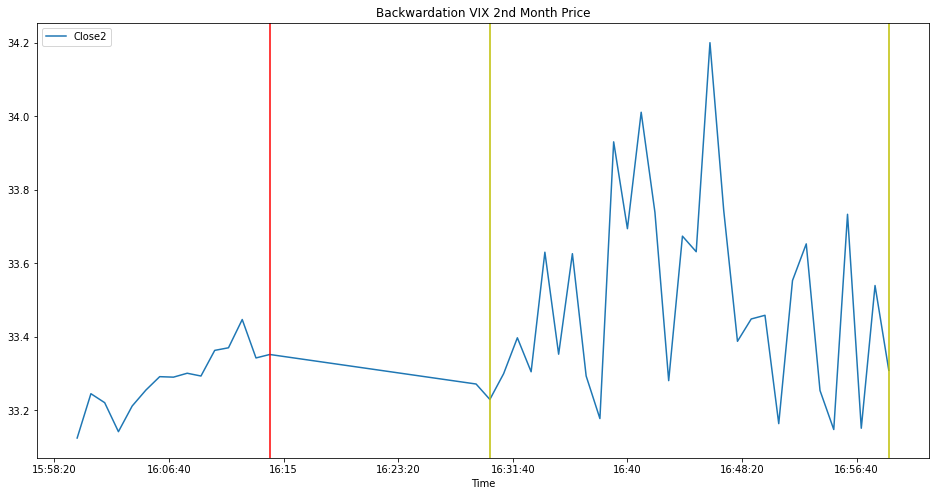

In [660]:
UX12extendedBack
BackExt=UX12extendedBack.groupby('Time').mean()
BackExt[['Close2']].plot(figsize=(16,8),label='UX1')
plt.title('Backwardation VIX 2nd Month Price')
plt.axvline('16:14:00', color='r')
plt.axvline('16:30:00', color='y')
plt.axvline('16:59:00', color='y')
plt.show()

In [971]:
aa=UX12extendedBack.at_time('15:55').set_index('Date')['Spread']
bb=UX12extendedBack.at_time('16:00').set_index('Date')['Spread']
cc=UX12extendedBack.at_time('16:05').set_index('Date')['Spread']
dd=UX12extendedBack.at_time('16:14').set_index('Date')['Spread']
contangostat2=pd.concat([aa,bb,cc,dd],axis=1,join='inner')
contangostat2.columns=['State1','State2','State3','Closing']
contangostat2['Long at 15:55']=contangostat2['Closing']-contangostat2['State1']
contangostat2['Long at 16:00']=contangostat2['Closing']-contangostat2['State2']
contangostat2['Long at 16:05']=contangostat2['Closing']-contangostat2['State3']

In [972]:
contSUM2=pd.concat([fm_summary(contangostat2['Long at 15:55']),fm_summary(contangostat2['Long at 16:00']),fm_summary(contangostat2['Long at 16:05'])],axis=1)
contSUM2.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUM2=contSUM2.astype('float64').round(2)
contSUM2.style.set_caption("Backwardation")

,Long 15:55,Long 16:00,Long 16:05
count,11.000000,11.000000,11.000000
mean,0.000000,-0.010000,0.020000
Up,7.000000,6.000000,6.000000
Down,4.000000,5.000000,5.000000
breakeven,0.000000,0.000000,0.000000
Up Mean,0.150000,0.090000,0.130000
Down Mean,-0.250000,-0.140000,-0.120000
Up Median,0.070000,0.080000,0.140000
Down Median,-0.270000,-0.100000,-0.140000
Up(%),0.640000,0.550000,0.550000


## Neutral

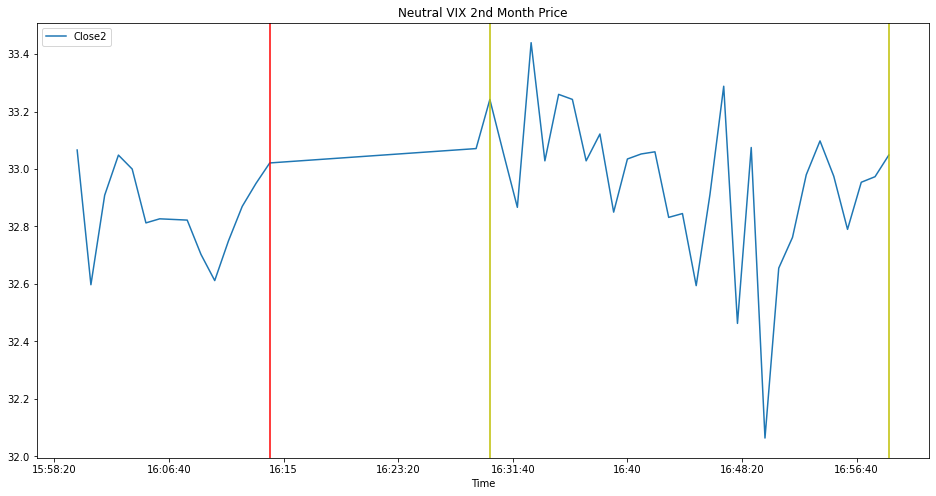

In [659]:
UX12extendedNeutral
NeutralExt=UX12extendedNeutral.groupby('Time').mean()
NeutralExt[['Close2']].plot(figsize=(16,8),label='UX1')
plt.title('Neutral VIX 2nd Month Price')
plt.axvline('16:14:00', color='r')
plt.axvline('16:30:00', color='y')
plt.axvline('16:59:00', color='y')
plt.show()

In [973]:
aaa=UX12extendedNeutral.at_time('15:55').set_index('Date')['Spread']
bbb=UX12extendedNeutral.at_time('16:00').set_index('Date')['Spread']
ccc=UX12extendedNeutral.at_time('16:05').set_index('Date')['Spread']
ddd=UX12extendedNeutral.at_time('16:14').set_index('Date')['Spread']
contangostat3=pd.concat([aaa,bbb,ccc,ddd],axis=1,join='inner')
contangostat3.columns=['State1','State2','State3','Closing']
contangostat3['Long at 15:55']=contangostat3['Closing']-contangostat3['State1']
contangostat3['Long at 16:00']=contangostat3['Closing']-contangostat3['State2']
contangostat3['Long at 16:05']=contangostat3['Closing']-contangostat3['State3']

In [974]:
contSUM3=pd.concat([fm_summary(contangostat3['Long at 15:55']),fm_summary(contangostat3['Long at 16:00']),fm_summary(contangostat3['Long at 16:05'])],axis=1)
contSUM3.columns=['Long 15:55','Long 16:00','Long 16:05']
contSUM3=contSUM3.astype('float64').round(2)
contSUM3.style.set_caption("Neutral")

,Long 15:55,Long 16:00,Long 16:05
count,4.000000,4.000000,4.000000
mean,0.040000,0.050000,0.040000
Up,2.000000,4.000000,3.000000
Down,2.000000,0.000000,1.000000
breakeven,0.000000,0.000000,0.000000
Up Mean,0.110000,0.050000,0.070000
Down Mean,-0.030000,nan,-0.040000
Up Median,0.110000,0.030000,0.040000
Down Median,-0.030000,nan,-0.040000
Up(%),0.500000,1.000000,0.750000


In [708]:
UX12extendedNeutral.head()

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Day,...,Close2,High2,Low2,Value2,Volume2,Number Ticks2,Volatility2,Time2,Day2,Spread
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-05 15:55:00-04:00,33.85,33.95,33.95,33.85,4710.0000,139,72,0.002950,15:55:00,1,...,33.80,33.80,33.70,5942.6699,176,97,0.002963,15:55:00,1,-0.15
2020-05-06 15:55:00-04:00,34.15,34.23,34.25,34.10,14047.7793,411,144,0.004389,15:55:00,2,...,34.17,34.17,34.07,11875.2207,348,110,0.002931,15:55:00,2,-0.06
2020-05-06 15:56:00-04:00,34.20,34.25,34.25,34.18,3285.0803,96,64,0.002046,15:56:00,2,...,34.18,34.20,34.12,3109.2903,91,53,0.002342,15:56:00,2,-0.07
2020-05-06 15:57:00-04:00,34.25,34.30,34.30,34.25,1748.6299,51,36,0.001459,15:57:00,2,...,34.25,34.25,34.19,991.9401,29,22,0.001753,15:57:00,2,-0.05
2020-05-06 15:58:00-04:00,34.30,34.35,34.35,34.24,3324.6301,97,63,0.003207,15:58:00,2,...,34.30,34.30,34.15,4859.7700,142,72,0.004383,15:58:00,2,-0.05


### Dissecting the Factor

In [922]:
#Extreme Contago 
t=pd.Series((v for v in UX12extendedContango.between_time('15:55','16:15')['Spread']))
s = t.describe()
s



count    2142.000000
mean        2.114099
std         1.465087
min         0.170000
25%         0.950000
50%         1.730000
75%         2.967500
max         6.650000
dtype: float64

## State 1


In [840]:
contangostat['State1'].rolling(5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4      0.616
       ...  
101    0.918
102    0.778
103    0.820
104    0.962
105    0.958
Name: State1, Length: 106, dtype: float64

In [927]:
contangostat.head(20)

,State1,State2,State3,Closing,Long at 15:55,Long at 16:00,Long at 16:05
2020-05-07,0.20,0.20,0.30,0.51,0.31,0.31,0.21
2020-05-08,1.30,1.33,1.30,1.36,0.06,0.03,0.06
2020-05-11,1.17,1.15,1.15,1.21,0.04,0.06,0.06
2020-05-14,0.19,0.25,0.31,0.51,0.32,0.26,0.20
2020-05-15,0.65,0.85,0.80,0.55,-0.10,-0.30,-0.25
2020-05-18,1.30,1.11,0.98,1.20,-0.10,0.09,0.22
2020-05-19,0.85,0.95,0.86,1.32,0.47,0.37,0.46
2020-05-21,0.56,0.60,0.56,0.55,-0.01,-0.05,-0.01
2020-05-22,0.54,0.60,0.59,0.70,0.16,0.10,0.11
2020-05-26,0.65,0.76,0.76,0.82,0.17,0.06,0.06


## State 2

## State 3

In [830]:
strat=UX12extendedContango.between_time('15:55','16:15')
strat

,Open,Close,High,Low,Value,Volume,Number Ticks,Volatility,Time,Day,...,Close2,High2,Low2,Value2,Volume2,Number Ticks2,Volatility2,Time2,Day2,Spread
Dates,,,,,,,,,,,,,,,,,,,,,
2020-05-07 15:55:00-04:00,32.90,32.90,32.95,32.85,6118.2397,186,87,0.003040,15:55:00,3,...,33.10,33.10,33.00,7602.6401,230,94,0.003026,15:55:00,3,0.20
2020-05-07 16:00:00-04:00,32.83,32.70,32.85,32.67,6935.0293,212,106,0.005495,16:00:00,3,...,32.90,32.97,32.85,8554.8604,260,122,0.003646,16:00:00,3,0.20
2020-05-07 16:01:00-04:00,32.68,32.65,32.68,32.59,15656.7813,480,177,0.002758,16:01:00,3,...,32.85,32.87,32.80,9195.8516,280,113,0.002132,16:01:00,3,0.20
2020-05-07 16:02:00-04:00,32.65,32.60,32.67,32.60,3656.3398,112,54,0.002145,16:02:00,3,...,32.80,32.87,32.80,7423.7505,226,96,0.002132,16:02:00,3,0.20
2020-05-07 16:03:00-04:00,32.64,32.60,32.65,32.55,8379.4297,257,80,0.003067,16:03:00,3,...,32.80,32.85,32.80,2462.3098,75,33,0.001523,16:03:00,3,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 16:10:00-05:00,25.70,25.69,25.73,25.65,1645.1000,64,33,0.003114,16:10:00,3,...,26.40,26.45,26.40,7797.8999,295,131,0.001892,16:10:00,3,0.71
2020-11-12 16:11:00-05:00,25.66,25.60,25.68,25.60,2870.1699,112,66,0.003120,16:11:00,3,...,26.40,26.40,26.35,8154.0200,309,157,0.001896,16:11:00,3,0.80
2020-11-12 16:12:00-05:00,25.60,25.63,25.68,25.59,3667.1699,143,74,0.003511,16:12:00,3,...,26.30,26.45,26.30,9814.2002,372,149,0.005687,16:12:00,3,0.67


# Seasonality Analysis

In [525]:
UX1s=data1.between_time('09:30','17:00')
UX2s=data2.between_time('09:30','17:00')
UX1s['Volatility']=np.log(UX1s['High'])-np.log(UX1s['Low'])
UX2s['Volatility']=np.log(UX2s['High'])-np.log(UX2s['Low'])
UX1s['TIME']=UX1s.index.time
UX2s['TIME']=UX2s.index.time
UX1s['DAY']=UX1s.index.dayofweek #Monday=0 Sunday=6 for seasonality grouping
UX2s['DAY']=UX2s.index.dayofweek
UX12s=pd.concat([UX1s,UX2s],axis=1, join='inner')
UX12s.columns=['Open','Close','High','Low','Value','Volume','Number Ticks','Volatility','Time','Day','Open2','Close2','High2','Low2','Value2','Volume2','Number Ticks2','Volatility2','Time2','Day2']
UX12s['Spread']=(UX12s['Close2']-UX12s['Close'])

<ipython-input-525-b0f5e5a6341f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX1s['Volatility']=np.log(UX1s['High'])-np.log(UX1s['Low'])
<ipython-input-525-b0f5e5a6341f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UX2s['Volatility']=np.log(UX2s['High'])-np.log(UX2s['Low'])
<ipython-input-525-b0f5e5a6341f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [538]:
season=UX12s.groupby(['Day','Time']).mean()
season

Open      Close       High        Low        Value  \
Day Time                                                                
0   09:30:00  29.175357  29.181071  29.250000  29.118214  8821.916921   
    09:31:00  29.167778  29.211481  29.268889  29.118889  9780.184859   
    09:32:00  29.227143  29.201429  29.272143  29.149643  6861.446332   
    09:33:00  29.200000  29.247778  29.284815  29.153333  6591.146637   
    09:34:00  29.258519  29.251852  29.325926  29.199259  6888.952930   
...                 ...        ...        ...        ...          ...   
4   16:55:00  28.914000  28.915600  28.920000  28.907600   371.059608   
    16:56:00  29.974737  29.982105  29.985789  29.969474   271.072626   
    16:57:00  29.467647  29.467059  29.479412  29.457059   447.179412   
    16:58:00  30.125714  30.117143  30.141429  30.111905   560.062371   
    16:59:00  29.409615  29.408077  29.443077  29.377308  1415.584669   

                  Volume  Number Ticks  Volatility      Open2     Close2  \
Day Time                                                                   
0   09:30:00  296.428571    157.821429    0.004419  30.855357  30.855000   
    09:31:00  328.555556    175.814815    0.005105  30.880000  30.902963   
    09:32:00  231.035714    122.785714    0.003964  30.885714  30.876786   
    09:33:00  221.259259    120.888889    0.004373  30.894074  30.946667   
    09:34:00  229.592593    126.888889    0.004228  30.949630  30.954074   
...                  ...           ...         ...        ...        ...   
4   16:55:00   13.040000      5.520000    0.000423  30.794000  30.788400   
    16:56:00    9.421053      5.105263    0.000538  31.532105  31.547895   
    16:57:00   15.705882      6.823529    0.000736  30.653529  30.650000   
    16:58:00   18.380952      6.333333    0.000961  31.749048  31.753333   
    16:59:00   48.846154     16.192308    0.002269  31.148846  31.155000   

                  High2       Low2       Value2     Volume2  Number Ticks2  \
Day Time                                                                     
0   09:30:00  30.907500  30.803214  6540.102396  210.642857     115.857143   
    09:31:00  30.948519  30.830741  6664.009093  212.888889     120.037037   
    09:32:00  30.930357  30.831071  4295.908804  138.607143      82.214286   
    09:33:00  30.975556  30.866296  4438.889763  141.148148      84.444444   
    09:34:00  31.013333  30.908519  5204.816941  161.185185      94.444444   
...                 ...        ...          ...         ...            ...   
4   16:55:00  30.800000  30.786400   360.346008   11.600000       5.560000   
    16:56:00  31.554211  31.526316   460.875779   14.315789       7.105263   
    16:57:00  30.661765  30.638824   324.450012   10.882353       7.058824   
    16:58:00  31.762857  31.739524   412.404762   13.142857       6.857143   
    16:59:00  31.176538  31.128846   697.678842   22.000000      10.615385   

              Volatility2  Day2    Spread  
Day Time                                   
0   09:30:00     0.003346   0.0  1.673929  
    09:31:00     0.003756   0.0  1.691481  
    09:32:00     0.003111   0.0  1.675357  
    09:33:00     0.003368   0.0  1.698889  
    09:34:00     0.003269   0.0  1.702222  
...                   ...   ...       ...  
4   16:55:00     0.000435   4.0  1.872800  
    16:56:00     0.000895   4.0  1.565789  
    16:57:00     0.000766   4.0  1.182941  
    16:58:00     0.000727   4.0  1.636190  
    16:59:00     0.001531   4.0  1.746923  

[2180 rows x 18 columns]

In [541]:
mon=season.loc[0,:]
tue=season.loc[1,:]
wed=season.loc[2,:]
thurs=season.loc[3,:]
fri=season.loc[4,:]

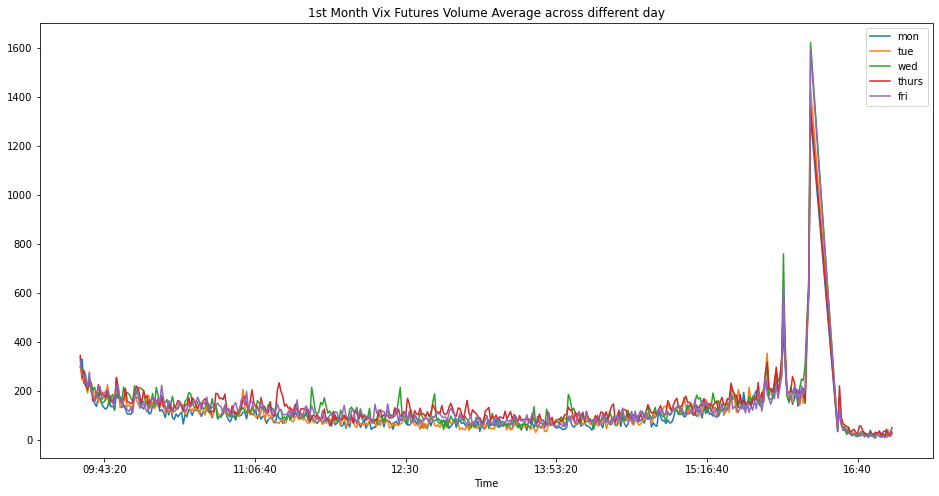

In [555]:
mon['Volume'].plot(figsize=(16,8),label='mon')
tue['Volume'].plot(figsize=(16,8),label='tue')
wed['Volume'].plot(figsize=(16,8),label='wed')
thurs['Volume'].plot(figsize=(16,8),label='thurs')
fri['Volume'].plot(figsize=(16,8),label='fri')
plt.title('1st Month Vix Futures Volume Average across different day')
plt.legend()
plt.show()
#plt.axvline('16:15:00', color='r')

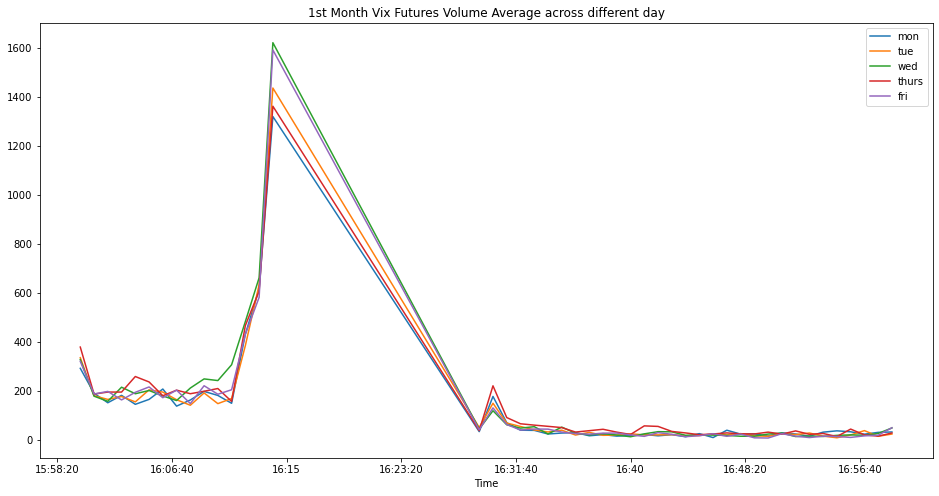

In [566]:
mon.iloc[390:,:]['Volume'].plot(figsize=(16,8),label='mon')
tue.iloc[390:,:]['Volume'].plot(figsize=(16,8),label='tue')
wed.iloc[390:,:]['Volume'].plot(figsize=(16,8),label='wed')
thurs.iloc[390:,:]['Volume'].plot(figsize=(16,8),label='thurs')
fri.iloc[390:,:]['Volume'].plot(figsize=(16,8),label='fri')
plt.title('1st Month Vix Futures Volume Average across different day')
plt.legend()
plt.show()
#plt.axvline('16:15:00', color='r')

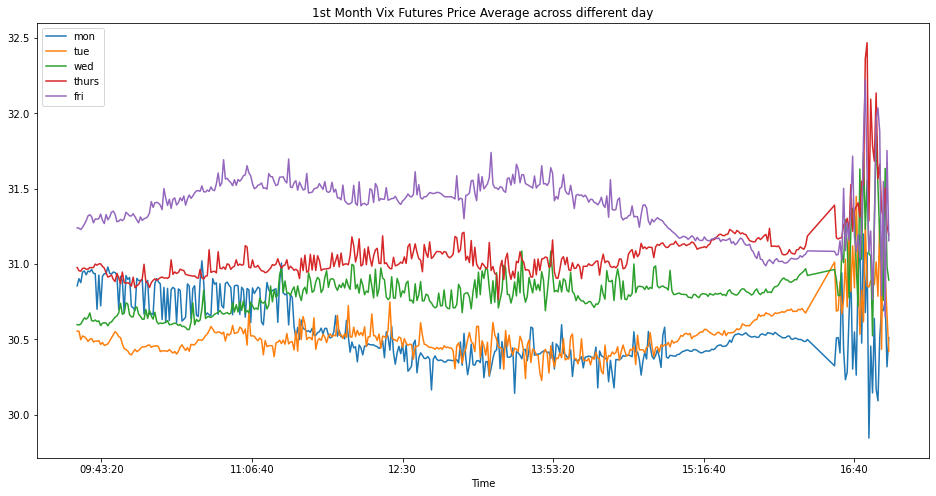

In [567]:
mon['Close2'].plot(figsize=(16,8),label='mon')
tue['Close2'].plot(figsize=(16,8),label='tue')
wed['Close2'].plot(figsize=(16,8),label='wed')
thurs['Close2'].plot(figsize=(16,8),label='thurs')
fri['Close2'].plot(figsize=(16,8),label='fri')
plt.title('1st Month Vix Futures Price Average across different day')
plt.legend()
plt.show()
#plt.axvline('16:15:00', color='r')

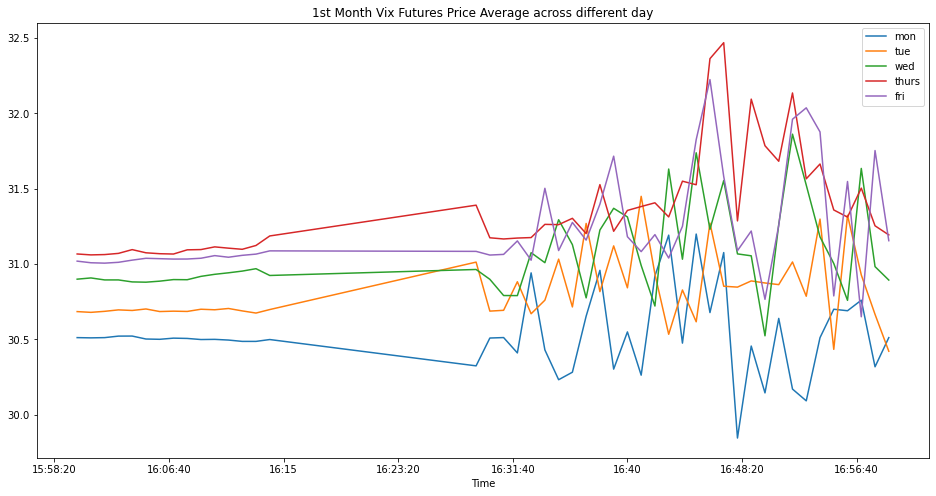

In [569]:
mon.iloc[390:,:]['Close2'].plot(figsize=(16,8),label='mon')
tue.iloc[390:,:]['Close2'].plot(figsize=(16,8),label='tue')
wed.iloc[390:,:]['Close2'].plot(figsize=(16,8),label='wed')
thurs.iloc[390:,:]['Close2'].plot(figsize=(16,8),label='thurs')
fri.iloc[390:,:]['Close2'].plot(figsize=(16,8),label='fri')
plt.title('1st Month Vix Futures Price Average across different day')
plt.legend()
plt.show()
#plt.axvline('16:15:00', color='r')

### ETF 